<h1>Intro Code</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dictionary utilized for the DFs
us_state_abbrev = {
    'Alabama': 'AL', 
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}

# Name of the CSV file
file = '../ignore/US_Accidents_May19.csv'
df = pd.read_csv(file)

#Source: https://www.fhwa.dot.gov/policyinformation/statistics/2017/
dl_file = '../ignore/US_DLCount.csv'
df_dlbystate = pd.read_csv(dl_file, thousands=',')

In [2]:
# Revised the csv exports slightly to meet header requirements.

#Read ACS CSVs
statepop_file = '../ignore/US_State_Population.csv'
df_statepop = pd.read_csv(statepop_file, encoding='iso-8859-1', thousands=',')

countypop_file = '../ignore/US_County_Population.csv'
df_countypop = pd.read_csv(countypop_file, encoding='iso-8859-1')

city_file = '../ignore/US_Cities_Population.csv'
df_citypop = pd.read_csv(city_file, encoding='iso-8859-1')

In [3]:
df.head()
df_statepop.head()
# df.count()

,Geographic Area,2010 Census,2010 Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55317240.0,55318443.0,55380134.0,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66927001.0,66929725.0,66974416.0,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114555744.0,114563030.0,114866680.0,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,71945553.0,71946907.0,72100436.0,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0


<h1>Data Cleaning</h1>

In [234]:
#Create Main Analysis DataFrame
df_location = df[["ID", "Severity", "Start_Time", 
#                   "End_Time",  "Distance(mi)",
                  "City", "County", "State", "Timezone"]]
df_location.head()
# df_location.count()
#Recategorize the timestamp - year, month, time categories
df_location["Start_Year"] = df_location["Start_Time"].agg(lambda x: x.split("-")[0])
df_location["Start_Month"] = df_location["Start_Time"].agg(lambda x: x.split("-")[1])
df_location["Start_HrMin"] = df_location["Start_Time"].agg(lambda x: x.split()[1])
df_location["Start_Hr"] = df_location["Start_HrMin"].agg(lambda x: x.split(":")[0])
dfcl_location = df_location [["ID", "Severity", 
                              "Start_Year", "Start_Month", "Start_Hr",
                              "City", "County", "State", "Timezone"]]
dfcl_location.head()

C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,ID,Severity,Start_Year,Start_Month,Start_Hr,City,County,State,Timezone
0,A-1,3,2016,02,05,Dayton,Montgomery,OH,US/Eastern
1,A-2,2,2016,02,06,Reynoldsburg,Franklin,OH,US/Eastern
2,A-3,2,2016,02,06,Williamsburg,Clermont,OH,US/Eastern
3,A-4,3,2016,02,07,Dayton,Montgomery,OH,US/Eastern
4,A-5,2,2016,02,07,Dayton,Montgomery,OH,US/Eastern


In [5]:
#DL by State
dfcl_dlbystate = df_dlbystate.replace({"Alaska 2/": "Alaska",
                                       "Hawaii 2/": "Hawaii",
                                       "Dist. of Col.": "District of Columbia"
                                      })
state_list = dfcl_dlbystate["STATE"].str.strip()
dfcl_dlbystate["STATE"] = state_list
dfcl_dlbystate = dfcl_dlbystate.replace({"STATE": us_state_abbrev})
dfcl_dlbystate.head()

,STATE,2015,2016,2017
0,AL,3907038,3943082,3954378
1,AK,533227,534585,534585
2,AZ,4978762,5082305,5164966
3,AR,2119578,2391103,2417464
4,CA,25532920,26199436,26777132


In [6]:
#Clean state population
# % of licensed drivers compared to total population
dfcl_statepop = df_statepop
dfcl_statepop['Geographic Area'] = dfcl_statepop['Geographic Area'].str.replace(".", "")
dfcl_statepop = dfcl_statepop [['Geographic Area', '2017']]

pop_state_list = dfcl_statepop["Geographic Area"].str.strip()
dfcl_statepop["Geographic Area"] = pop_state_list
dfcl_statepop = dfcl_statepop.replace({"Geographic Area": us_state_abbrev})

df_dlpop = dfcl_dlbystate[["STATE", "2017"]]
df_dlpop = pd.merge(df_dlpop, dfcl_statepop, how="left", left_on=["STATE"], right_on = "Geographic Area")
df_dlpop = df_dlpop.rename(columns={"2017_x": "2017 - DL", "2017_y": "2017 - POP"})
df_dlpop = df_dlpop[["STATE", "2017 - DL", "2017 - POP"]]
#Removes "TOTAL"
df_dlpop = df_dlpop.drop([51])
df_dlpop['2017 - POP'] = df_dlpop['2017 - POP'].astype(int)
df_dlpop["Perc_Drivers"] = df_dlpop["2017 - DL"] / df_dlpop["2017 - POP"] * 100
df_dlpop

C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STATE,2017 - DL,2017 - POP,Perc_Drivers
0,AL,3954378,4874486,81.124000
1,AK,534585,739700,72.270515
2,AZ,5164966,7044008,73.324249
3,AR,2417464,3001345,80.546022
4,CA,26777132,39358497,68.033929
5,CO,4156138,5611885,74.059572
6,CT,2586994,3573297,72.397956
7,DE,770512,956823,80.528165
8,DC,521056,694906,74.982228
9,FL,15076358,20963613,71.916792


In [83]:
# Clean county population
### START HERE###
dfcl_countypop = df_countypop
dfcl_countypop.columns = [x.strip().replace('Population Estimate (as of July 1) - ', '') for x in dfcl_countypop.columns]
dfcl_countypop.columns = [x.strip().replace('April 1, ', '') for x in dfcl_countypop.columns]
dfcl_countypop.columns = [x.strip().replace('Census', '') for x in dfcl_countypop.columns]
dfcl_countypop.columns = [x.strip().replace('-', '') for x in dfcl_countypop.columns]
dfcl_countypop.columns = [x.strip().replace('Estimates Base', '') for x in dfcl_countypop.columns]

dfcl_countypop = dfcl_countypop[["Geography", "2017"]]
dfcl_countypop["County"] = dfcl_countypop["Geography"].agg(lambda x: x.split(",")[0])
dfcl_countypop["State"] = dfcl_countypop["Geography"].agg(lambda x: x.split(",")[1])

state_list = dfcl_countypop["State"].str.strip()
dfcl_countypop["State"] = state_list
dfcl_countypop = dfcl_countypop.replace({"State": us_state_abbrev})

dfcl_countypop['County'] = dfcl_countypop['County'].str.replace(" County", "")
dfcl_countypop

C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWa

,Geography,2017,County,State
0,"Autauga County, Alabama",55443,Autauga,AL
1,"Baldwin County, Alabama",212619,Baldwin,AL
2,"Barbour County, Alabama",25158,Barbour,AL
3,"Bibb County, Alabama",22555,Bibb,AL
4,"Blount County, Alabama",57827,Blount,AL
...,...,...,...,...
3137,"Sweetwater County, Wyoming",43547,Sweetwater,WY
3138,"Teton County, Wyoming",23261,Teton,WY
3139,"Uinta County, Wyoming",20456,Uinta,WY
3140,"Washakie County, Wyoming",8035,Washakie,WY


In [151]:
# Clean city population
### START HERE###
dfcl_citypop = df_citypop
dfcl_citypop.columns = [x.strip().replace('Population Estimate (as of July 1) - ', '') for x in dfcl_citypop.columns]
dfcl_citypop.columns = [x.strip().replace('April 1, ', '') for x in dfcl_citypop.columns]
dfcl_citypop.columns = [x.strip().replace('Census', '') for x in dfcl_citypop.columns]
dfcl_citypop.columns = [x.strip().replace('-', '') for x in dfcl_citypop.columns]
dfcl_citypop.columns = [x.strip().replace('Estimates Base', '') for x in dfcl_citypop.columns]
dfcl_citypop

dfcl_citypop = dfcl_citypop[["Geography.2", "2017"]]
dfcl_citypop["City"] = dfcl_citypop["Geography.2"].agg(lambda x: x.split(",")[0])
dfcl_citypop["State"] = dfcl_citypop["Geography.2"].agg(lambda x: x.split(",")[1])

state_list = dfcl_citypop["State"].str.strip()
dfcl_citypop["State"] = state_list
dfcl_citypop = dfcl_citypop.replace({"State": us_state_abbrev})

dfcl_citypop['City'] = dfcl_citypop['City'].str.replace(" city", "")
dfcl_citypop


# dfcl_citypop.loc[(dfcl_citypop["City"] == "Springfield")]["State"].value_counts()

C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a

OH    1
IL    1
OR    1
MA    1
MO    1
Name: State, dtype: int64

<h1>Driver Info Background</h1>

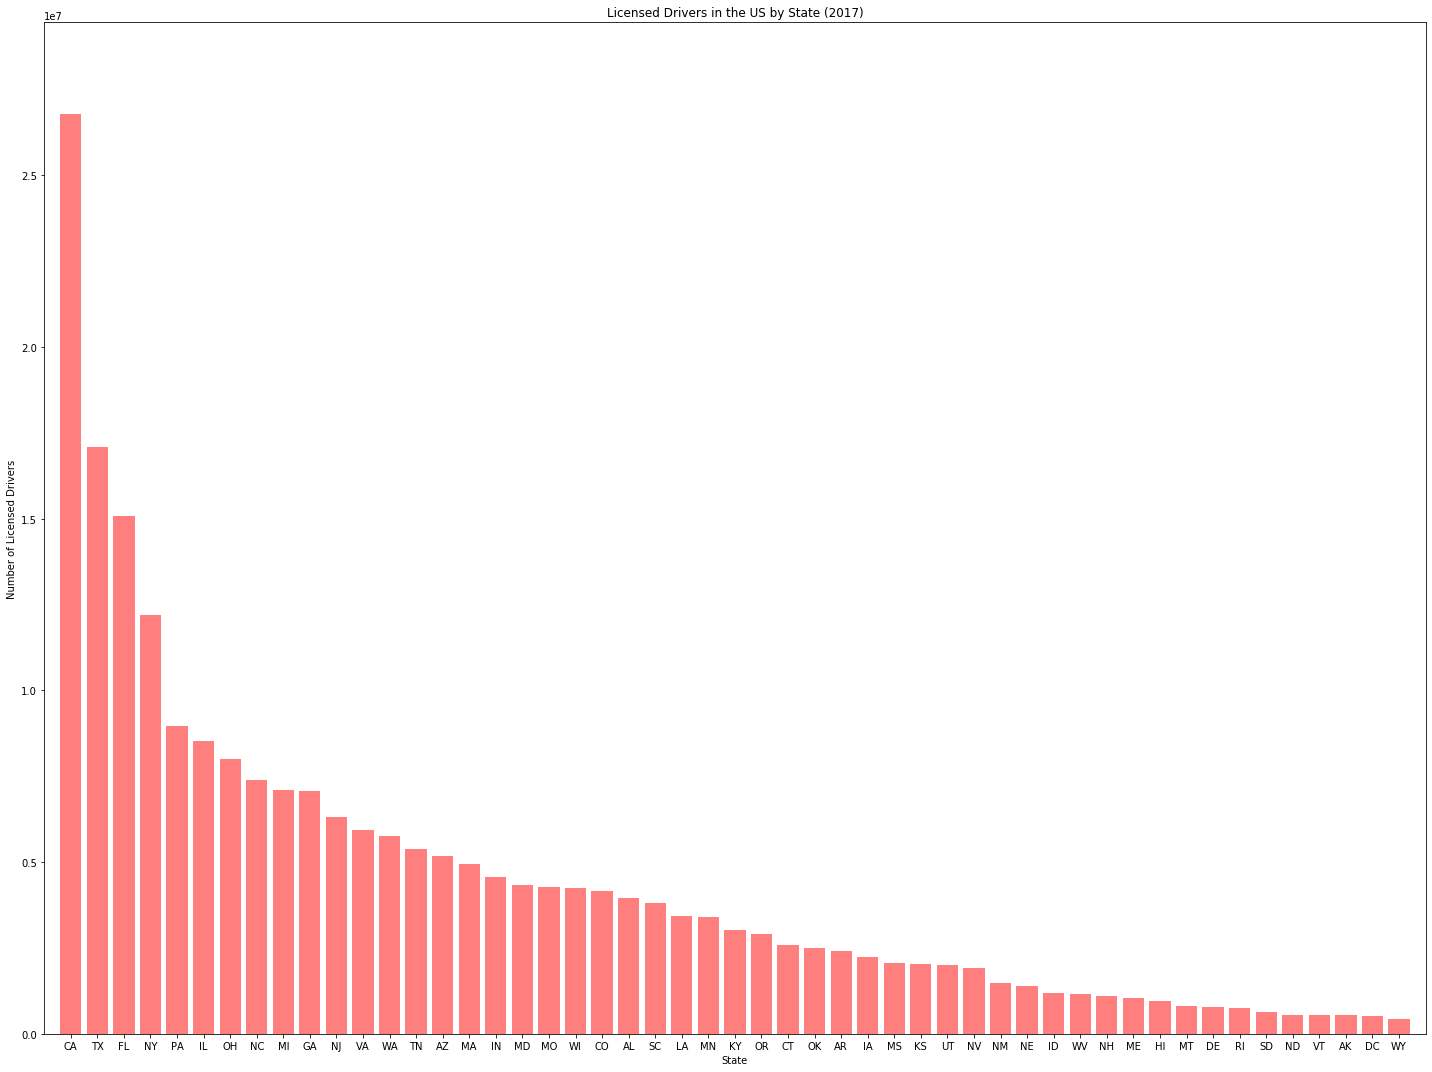

In [9]:
#Licensed Drivers by State
dl_2017 = dfcl_dlbystate[["STATE", "2017"]].sort_values("2017", ascending = False)
dl_2017 = dl_2017.reset_index(drop= True)

#drop the total row
dl_2017 = dl_2017.drop(0)

x_axis = np.arange(len(dl_2017["STATE"]))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(x_axis, dl_2017["2017"], color='r', alpha=0.5, align="center")
plt.xticks(x_axis, dl_2017["STATE"])

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max( dl_2017["2017"])*1.1)

# # Set a Title and labels
plt.title("Licensed Drivers in the US by State (2017)")
plt.xlabel("State")
plt.ylabel("Number of Licensed Drivers")

# # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_DL_byState.png")
plt.show()

###Add labels, fix y-ticks and ticklabels
###labels, design.. look at mapping

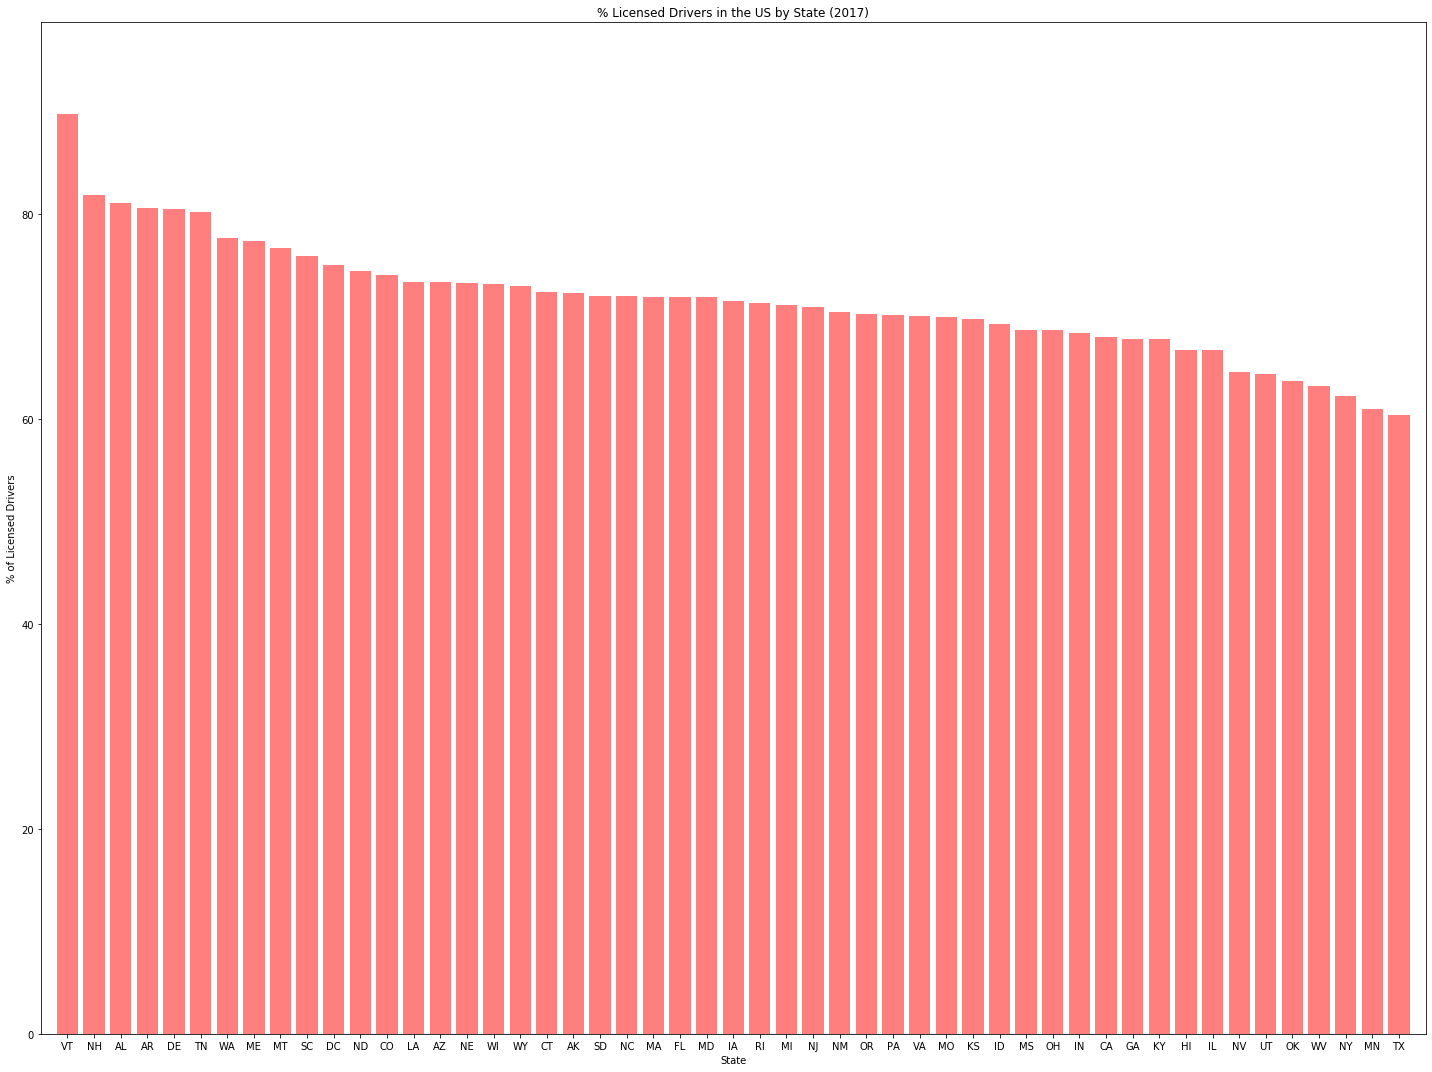

In [10]:
#% of Licensed Drivers by State
percdl_2017 = df_dlpop[["STATE", "Perc_Drivers"]].sort_values("Perc_Drivers", ascending = False)
percdl_2017 = percdl_2017.reset_index(drop= True)

x_axis = np.arange(len(percdl_2017["STATE"]))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(x_axis, percdl_2017["Perc_Drivers"], color='r', alpha=0.5, align="center")
plt.xticks(x_axis, percdl_2017["STATE"])

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(percdl_2017["Perc_Drivers"])*1.1)

# # Set a Title and labels
plt.title("% Licensed Drivers in the US by State (2017)")
plt.xlabel("State")
plt.ylabel("% of Licensed Drivers")

# # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_%DL_byState.png")
plt.show()

###Add labels, fix y-ticks and ticklabels
###labels, design.. look at mapping

<h1>Accidents Over Time</h1>

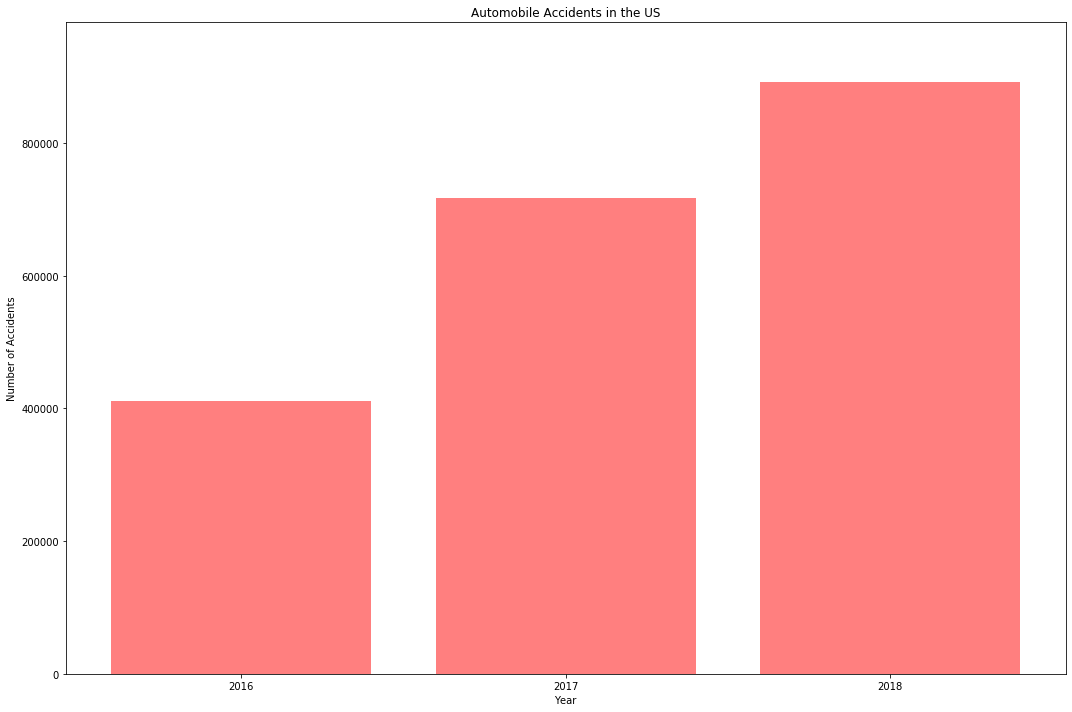

In [11]:
dfcl_2015_loc = dfcl_location.loc[dfcl_location["Start_Year"] == "2015", :]
dfcl_2016_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2016", :]
dfcl_2017_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2017", :]
dfcl_2018_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2018", :]
dfcl_2019_loc = dfcl_location.loc[dfcl_location["Start_Year"] == "2019", :]

#Remove 2015 going forward - only 1 accident.
#Remove 2019 going forward - only goes until April.
total_2016 = len (dfcl_2016_loc)
total_2017 = len (dfcl_2017_loc)
total_2018 = len (dfcl_2018_loc)

years = ["2016", "2017", "2018"]
total_accidents = [total_2016, total_2017, total_2018]

df_annualaccidents = pd.DataFrame ({"Year": years,
                                  "Accidents": total_accidents})

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,10))
plt.bar(years, total_accidents, color='r', alpha=0.5, align="center")
plt.xticks(years, years)

# # Set x and y limits
plt.ylim(0, max(total_accidents)*1.1)

# # # Set a Title and labels
plt.title("Automobile Accidents in the US")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

# # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/AnnualUSAccidents.png")
plt.show()

###Format chart

<h2> by State </h2>

In [12]:
###ACCIDENTS BY STATE - DF and Chart ###
# df_bystate
dfcl_state = dfcl_location[["Start_Year", "State", "ID"]]
count_state = dfcl_state.groupby(['Start_Year', 'State'])["ID"].count()
dfcl_state_year = pd.DataFrame({"Number of Accidents": count_state})
dfcl_state_year = dfcl_state_year.reset_index()
dfcl_state_year

dfcl_2016_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

#Clean 2016 DataFrame
dfcl_state = dfcl_2016_state.rename(columns={"Number of Accidents": "Number of Accidents in 2016"}).drop("Start_Year", axis = 1)
#Merge and Clean 2017 DataFrame
dfcl_state = pd.merge(dfcl_state, dfcl_2017_state, how="outer", on = "State")
dfcl_state = dfcl_state.rename(columns={"Number of Accidents": "Number of Accidents in 2017"}).drop("Start_Year", axis = 1)
#Merage and Clean 2018 DataFrame
dfcl_state = pd.merge(dfcl_state, dfcl_2018_state, how="outer", on = "State")
dfcl_state = dfcl_state.rename(columns={"Number of Accidents": "Number of Accidents in 2018"}).drop("Start_Year", axis = 1)
#Fill Nan's with 0
dfcl_state = dfcl_state.fillna(0)

# #create total column
dfcl_state["Accidents over 3 Years"] = dfcl_state["Number of Accidents in 2018"] + dfcl_state["Number of Accidents in 2017"] + dfcl_state["Number of Accidents in 2016"]
dfcl_state = dfcl_state.sort_values("Accidents over 3 Years", ascending = False).reset_index(drop = True)
dfcl_state


,State,Number of Accidents in 2016,Number of Accidents in 2017,Number of Accidents in 2018,Accidents over 3 Years
0,CA,140456,152668,156785,449909
1,TX,49766,85538,84050,219354
2,FL,37033,60665,65744,163442
3,NC,6147,34091,56236,96474
4,NY,20026,36879,37953,94858
5,SC,3015,28331,56361,87707
6,PA,21208,26871,22215,70294
7,MI,16630,27424,24287,68341
8,IL,17077,25289,24064,66430
9,GA,13242,22059,24613,59914


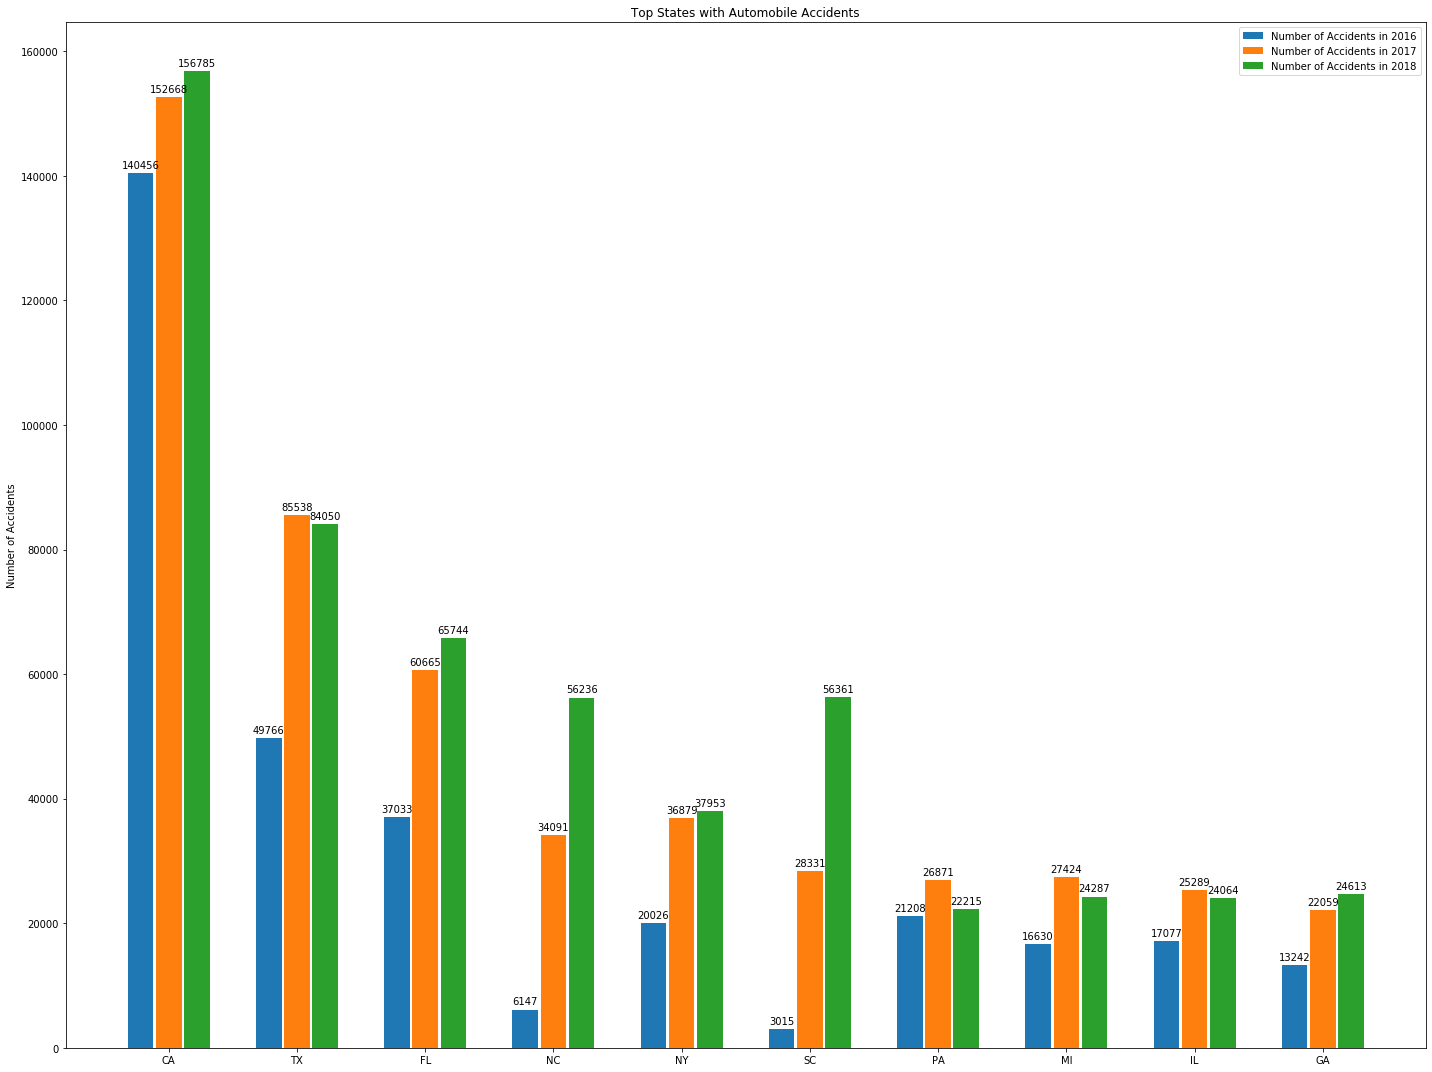

In [13]:
###ACCIDENTS BY STATE Chart ###
#set your top number here
top_number = 10

states_tochart = dfcl_state.iloc[0:top_number, :]

labels = states_tochart["State"]
acc_2016 = states_tochart["Number of Accidents in 2016"]
acc_2017 = states_tochart["Number of Accidents in 2017"]
acc_2018 = states_tochart["Number of Accidents in 2018"]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, acc_2016, width, label='Number of Accidents in 2016')
rects2 = ax.bar(x, acc_2017, width, label='Number of Accidents in 2017')
rects3 = ax.bar(x + width*1.1, acc_2018, width, label='Number of Accidents in 2018')


# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents')
ax.set_title('Top States with Automobile Accidents')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig("Outputs/TopStateswithAccidents.png")
plt.show()

<h2> by County </h2>

In [128]:
#Accidents by County in 2016, 2017, 2018
# df_bycounty
dfcl_county = dfcl_location[["Start_Year", "County", "State", "ID"]]
count_county = dfcl_county.groupby(['Start_Year', 'County', 'State'])["ID"].count()
dfcl_county_year = pd.DataFrame({"Number of Accidents": count_county})
dfcl_county_year = dfcl_county_year.reset_index()

dfcl_2016_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

#Clean 2016 DataFrame
dfcl_county = dfcl_2016_county.rename(columns={"Number of Accidents": "Number of Accidents in 2016"}).drop("Start_Year", axis = 1)
# Merge and Clean 2017 DataFrame
dfcl_county = pd.merge(dfcl_county, dfcl_2017_county, how="outer", on = ["County", "State"])
dfcl_county = dfcl_county.rename(columns={"Number of Accidents": "Number of Accidents in 2017"}).drop("Start_Year", axis = 1)
#Merage and Clean 2018 DataFrame
dfcl_county = pd.merge(dfcl_county, dfcl_2018_county, how="outer", on = ["County", "State"])
dfcl_county = dfcl_county.rename(columns={"Number of Accidents": "Number of Accidents in 2018"}).drop("Start_Year", axis = 1)
#Fill Nan's with 0
dfcl_county = dfcl_county.fillna(0)
dfcl_county
#create total column
dfcl_county["Accidents over 3 Years"] = dfcl_county["Number of Accidents in 2018"] + dfcl_county["Number of Accidents in 2017"] + dfcl_county["Number of Accidents in 2016"]
dfcl_county = dfcl_county.sort_values("Accidents over 3 Years", ascending = False).reset_index(drop = True)
###drill down to ca if data is available
# dfcl_county["County"].value_counts()
# dfcl_county_year["County"].value_counts()
# dfcl_county.loc[(dfcl_county["County"] == "Washington")]["State"].value_counts()
# dfcl_county
dfcl_county

,County,State,Number of Accidents in 2016,Number of Accidents in 2017,Number of Accidents in 2018,Accidents over 3 Years
0,Los Angeles,CA,51936.0,52925.0,55223.0,160084.0
1,Harris,TX,16281.0,31770.0,27071.0,75122.0
2,Dallas,TX,13729.0,19744.0,17389.0,50862.0
3,Mecklenburg,NC,4544.0,18036.0,26956.0,49536.0
4,Travis,TX,11575.0,16399.0,17589.0,45563.0
...,...,...,...,...,...,...
2730,Rock,NE,0.0,0.0,1.0,1.0
2731,Bourbon,KS,0.0,0.0,1.0,1.0
2732,Montgomery,AR,0.0,0.0,1.0,1.0
2733,Monroe,WV,0.0,0.0,1.0,1.0


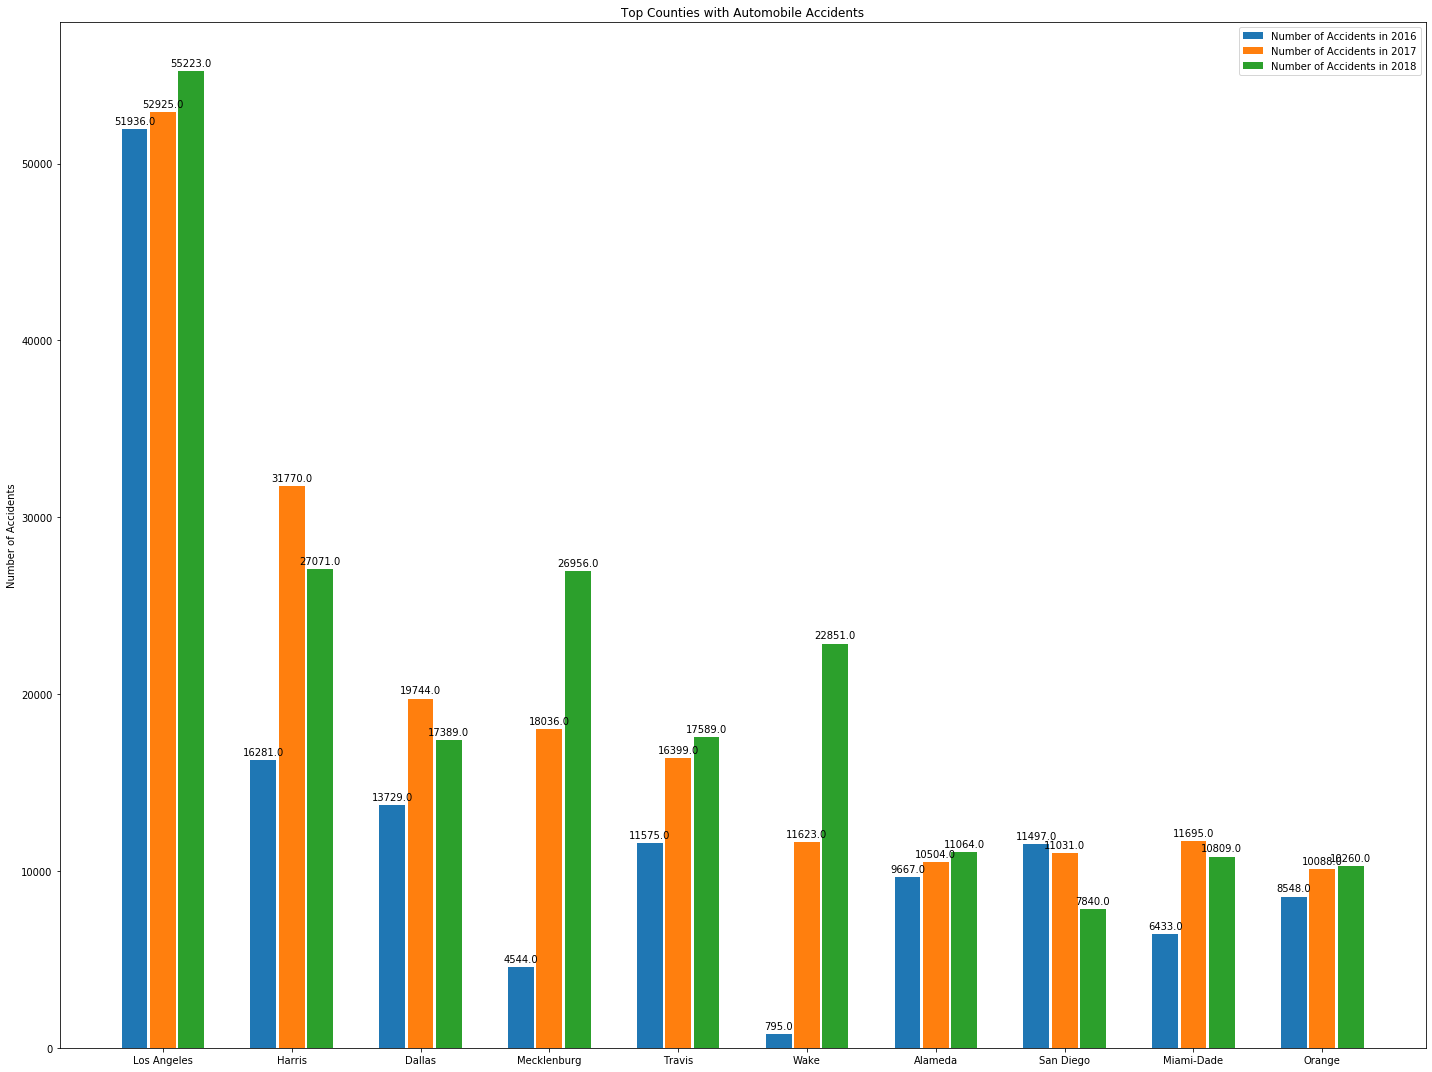

In [129]:
#Accidents by County Chart
#set your top number here
top_number = 10

counties_tochart = dfcl_county.iloc[0:top_number, :]

labels = counties_tochart["County"]
acc_2016 = counties_tochart["Number of Accidents in 2016"]
acc_2017 = counties_tochart["Number of Accidents in 2017"]
acc_2018 = counties_tochart["Number of Accidents in 2018"]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, acc_2016, width, label='Number of Accidents in 2016')
rects2 = ax.bar(x, acc_2017, width, label='Number of Accidents in 2017')
rects3 = ax.bar(x + width*1.1, acc_2018, width, label='Number of Accidents in 2018')


# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents')
ax.set_title('Top Counties with Automobile Accidents')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig("Outputs/TopCountieswithAccidents.png")
plt.show()

<h2> by City </h2>

In [170]:
#Accidents by City in 2016, 2017, 2018
dfcl_city = dfcl_location[["Start_Year", "City", "State", "ID"]]
count_city = dfcl_city.groupby(['Start_Year', 'City', "State"])["ID"].count()
dfcl_city_year = pd.DataFrame({"Number of Accidents": count_city})
dfcl_city_year = dfcl_city_year.reset_index()
dfcl_city_year

dfcl_2016_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

#Clean 2016 DataFrame
dfcl_city = dfcl_2016_city.rename(columns={"Number of Accidents": "Number of Accidents in 2016"}).drop("Start_Year", axis = 1)
#Merge and Clean 2017 DataFrame
dfcl_city = pd.merge(dfcl_city, dfcl_2017_city, how="outer", on = ["City", "State"])
dfcl_city = dfcl_city.rename(columns={"Number of Accidents": "Number of Accidents in 2017"}).drop("Start_Year", axis = 1)
#Merge and Clean 2018 DataFrame
dfcl_city = pd.merge(dfcl_city, dfcl_2018_city, how="outer", on = ["City", "State"])
dfcl_city = dfcl_city.rename(columns={"Number of Accidents": "Number of Accidents in 2018"}).drop("Start_Year", axis = 1)
#Fill Nan's with 0
dfcl_city = dfcl_city.fillna(0)

# #create total column
dfcl_city["Accidents over 3 Years"] = dfcl_city["Number of Accidents in 2018"] + dfcl_city["Number of Accidents in 2017"] + dfcl_city["Number of Accidents in 2016"]
dfcl_city = dfcl_city.sort_values("Accidents over 3 Years", ascending = False).reset_index(drop = True)

dfcl_city.head(10)


,City,State,Number of Accidents in 2016,Number of Accidents in 2017,Number of Accidents in 2018,Accidents over 3 Years
0,Houston,TX,15567.0,30282.0,25229.0,71078.0
1,Los Angeles,CA,15066.0,15346.0,15779.0,46191.0
2,Charlotte,NC,4224.0,16789.0,25127.0,46140.0
3,Dallas,TX,11872.0,17188.0,14180.0,43240.0
4,Austin,TX,10735.0,15168.0,16102.0,42005.0
5,Atlanta,GA,6306.0,10105.0,11472.0,27883.0
6,Raleigh,NC,593.0,8941.0,17244.0,26778.0
7,Miami,FL,5135.0,9206.0,8628.0,22969.0
8,Orlando,FL,5901.0,7333.0,7350.0,20584.0
9,Baton Rouge,LA,281.0,6657.0,11980.0,18918.0


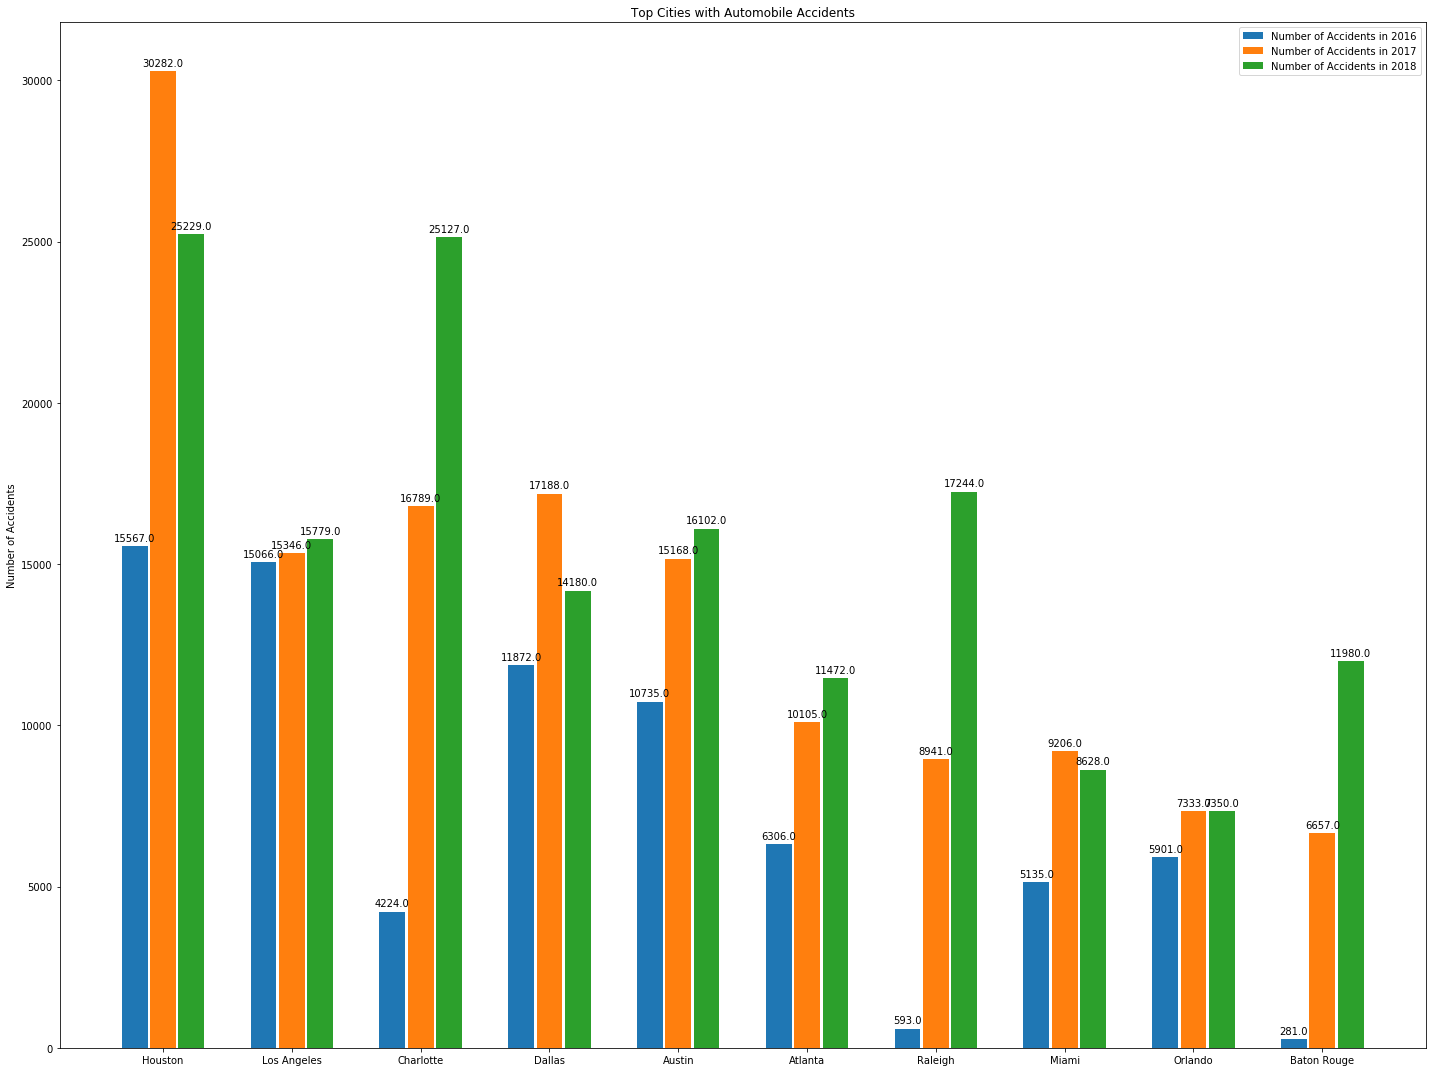

In [171]:
#set your top number here
top_number = 10

cities_tochart = dfcl_city.iloc[0:top_number, :]

labels = cities_tochart["City"]
acc_2016 = cities_tochart["Number of Accidents in 2016"]
acc_2017 = cities_tochart["Number of Accidents in 2017"]
acc_2018 = cities_tochart["Number of Accidents in 2018"]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, acc_2016, width, label='Number of Accidents in 2016')
rects2 = ax.bar(x, acc_2017, width, label='Number of Accidents in 2017')
rects3 = ax.bar(x + width*1.1, acc_2018, width, label='Number of Accidents in 2018')


# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents')
ax.set_title('Top Cities with Automobile Accidents')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig("Outputs/TopCitieswithAccidents.png")
plt.show()

<h1>Accident Frequency</h1>

<h2> by State</h2>

In [18]:
#Most Frequent Accident States in 2017 (drivers)
df_2017st_dlacc = pd.merge(dfcl_2017_state, dfcl_dlbystate, how="left", left_on=["State"], right_on = "STATE")
df_2017st_dlacc = df_2017st_dlacc[["Start_Year", "State", "Number of Accidents", "2017"]]
df_2017st_dlacc = df_2017st_dlacc.rename(columns={"2017": "Licensed Drivers"})
df_2017st_dlacc ["Accidents per 1,000 Drivers"] = df_2017st_dlacc["Number of Accidents"]/df_2017st_dlacc["Licensed Drivers"]*1000
df_2017st_dlacc = df_2017st_dlacc.sort_values("Accidents per 1,000 Drivers", ascending = False)
df_2017st_dlacc.head()

,Start_Year,State,Number of Accidents,Licensed Drivers,"Accidents per 1,000 Drivers"
43,2017,SC,28331,3810962,7.434081
48,2017,CA,152668,26777132,5.701432
47,2017,TX,85538,17099340,5.002415
44,2017,NC,34091,7389467,4.613459
23,2017,NE,6203,1404479,4.416584


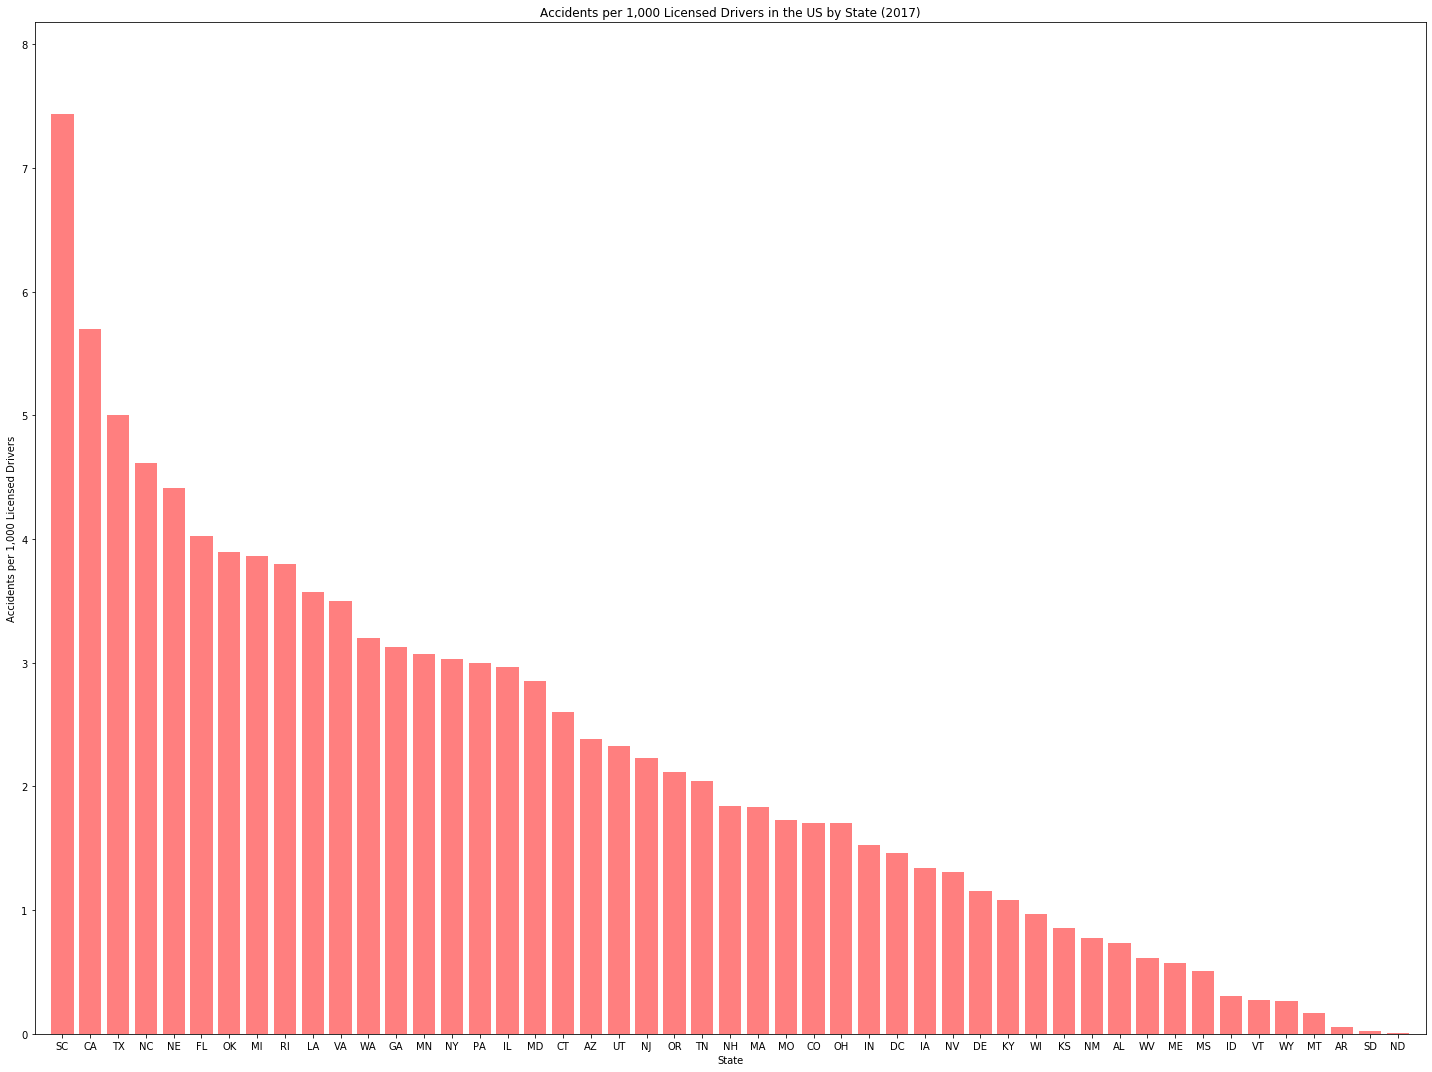

In [19]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(df_2017st_dlacc["State"], df_2017st_dlacc["Accidents per 1,000 Drivers"], color='r', alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-1, len(df_2017st_dlacc["State"]))
plt.ylim(0, max(df_2017st_dlacc["Accidents per 1,000 Drivers"]*1.1))

# # # Set a Title and labels
plt.title("Accidents per 1,000 Licensed Drivers in the US by State (2017)")
plt.xlabel("State")
plt.ylabel("Accidents per 1,000 Licensed Drivers")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsperDrivers_byState.png")
plt.show()

###labels, design.. look at mapping

In [20]:
#Most Frequent Accident States in 2017 (population)
df_2017st_popacc = pd.merge(dfcl_2017_state, df_dlpop, how="left", left_on=["State"], right_on = "STATE")
df_2017st_popacc = df_2017st_popacc[["Start_Year", "State", "Number of Accidents", "2017 - POP"]]
df_2017st_popacc = df_2017st_popacc.rename(columns={"2017 - POP": "Population"})
df_2017st_popacc ["Accidents per 1,000 Population"] = df_2017st_popacc["Number of Accidents"]/df_2017st_popacc["Population"]*1000
df_2017st_popacc = df_2017st_popacc.sort_values("Accidents per 1,000 Population", ascending = False)
df_2017st_popacc.head()

,Start_Year,State,Number of Accidents,Population,"Accidents per 1,000 Population"
43,2017,SC,28331,5021268,5.642200
48,2017,CA,152668,39358497,3.878908
44,2017,NC,34091,10268233,3.320045
23,2017,NE,6203,1915947,3.237563
47,2017,TX,85538,28295273,3.023049


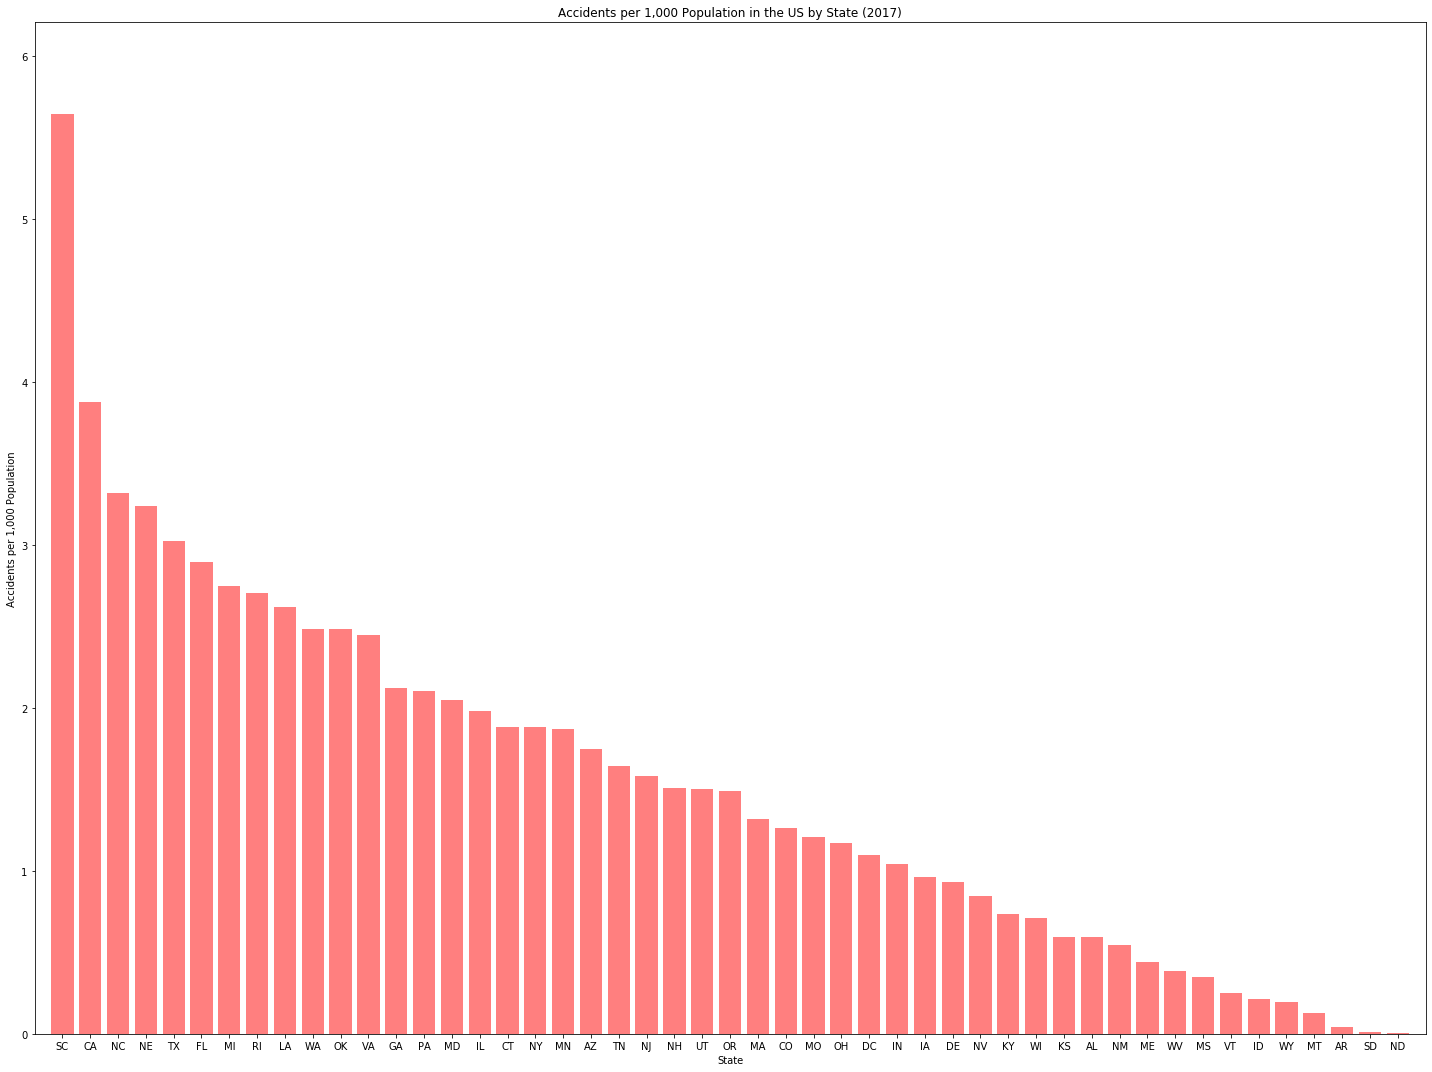

In [21]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(df_2017st_popacc["State"], df_2017st_popacc["Accidents per 1,000 Population"], color='r', alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-1, len(df_2017st_popacc["State"]))
plt.ylim(0, max(df_2017st_popacc["Accidents per 1,000 Population"]*1.1))

# # # Set a Title and labels
plt.title("Accidents per 1,000 Population in the US by State (2017)")
plt.xlabel("State")
plt.ylabel("Accidents per 1,000 Population")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsperPopulation_byState.png")
plt.show()

###labels, design.. look at mapping

<h2> by County</h2>

In [173]:
#Most Frequent Accident Counties in 2017 (population)
df_2017co_popacc = pd.merge(dfcl_2017_county, dfcl_countypop, how="left", left_on=["County", "State"], 
                           right_on = ["County", "State"])
df_2017co_popacc = df_2017co_popacc[["Start_Year", "County", "State", "Number of Accidents", "2017"]]
df_2017co_popacc = df_2017co_popacc.rename(columns={"2017": "Population"})
df_2017co_popacc ["Accidents per 1,000 Population"] = df_2017co_popacc["Number of Accidents"]/df_2017co_popacc["Population"]*1000
# df_2017co_popacc = df_2017co_popacc.sort_values("Accidents per 1,000 Population", ascending = False)
df_2017co_popacc = df_2017co_popacc.sort_values("Number of Accidents", ascending = False)
df_2017co_popacc.head(10)


# df_2017co_popacc.loc[(df_2017co_popacc["County"] == "San Francisco")]

#There are Nan Values, but the accident values are small; so it will be OK.
# df_2017co_popacc.isna().sum()
# df1 = df_2017co_popacc[df_2017co_popacc.isna().any(axis=1)]
# df1["Number of Accidents"].max()

,Start_Year,County,State,Number of Accidents,Population,"Accidents per 1,000 Population"
2363,2017,Los Angeles,CA,52925,10118759.0,5.230384
2362,2017,Harris,TX,31770,4664159.0,6.811517
2361,2017,Dallas,TX,19744,2622799.0,7.527836
2360,2017,Mecklenburg,NC,18036,1077311.0,16.741684
2359,2017,Travis,TX,16399,1227771.0,13.356725
2358,2017,Miami-Dade,FL,11695,2744878.0,4.260663
2357,2017,Wake,NC,11623,1071886.0,10.843504
2356,2017,Montgomery,PA,11341,824562.0,13.753969
2355,2017,San Diego,CA,11031,3325468.0,3.317127
2354,2017,King,WA,10950,2204229.0,4.967723


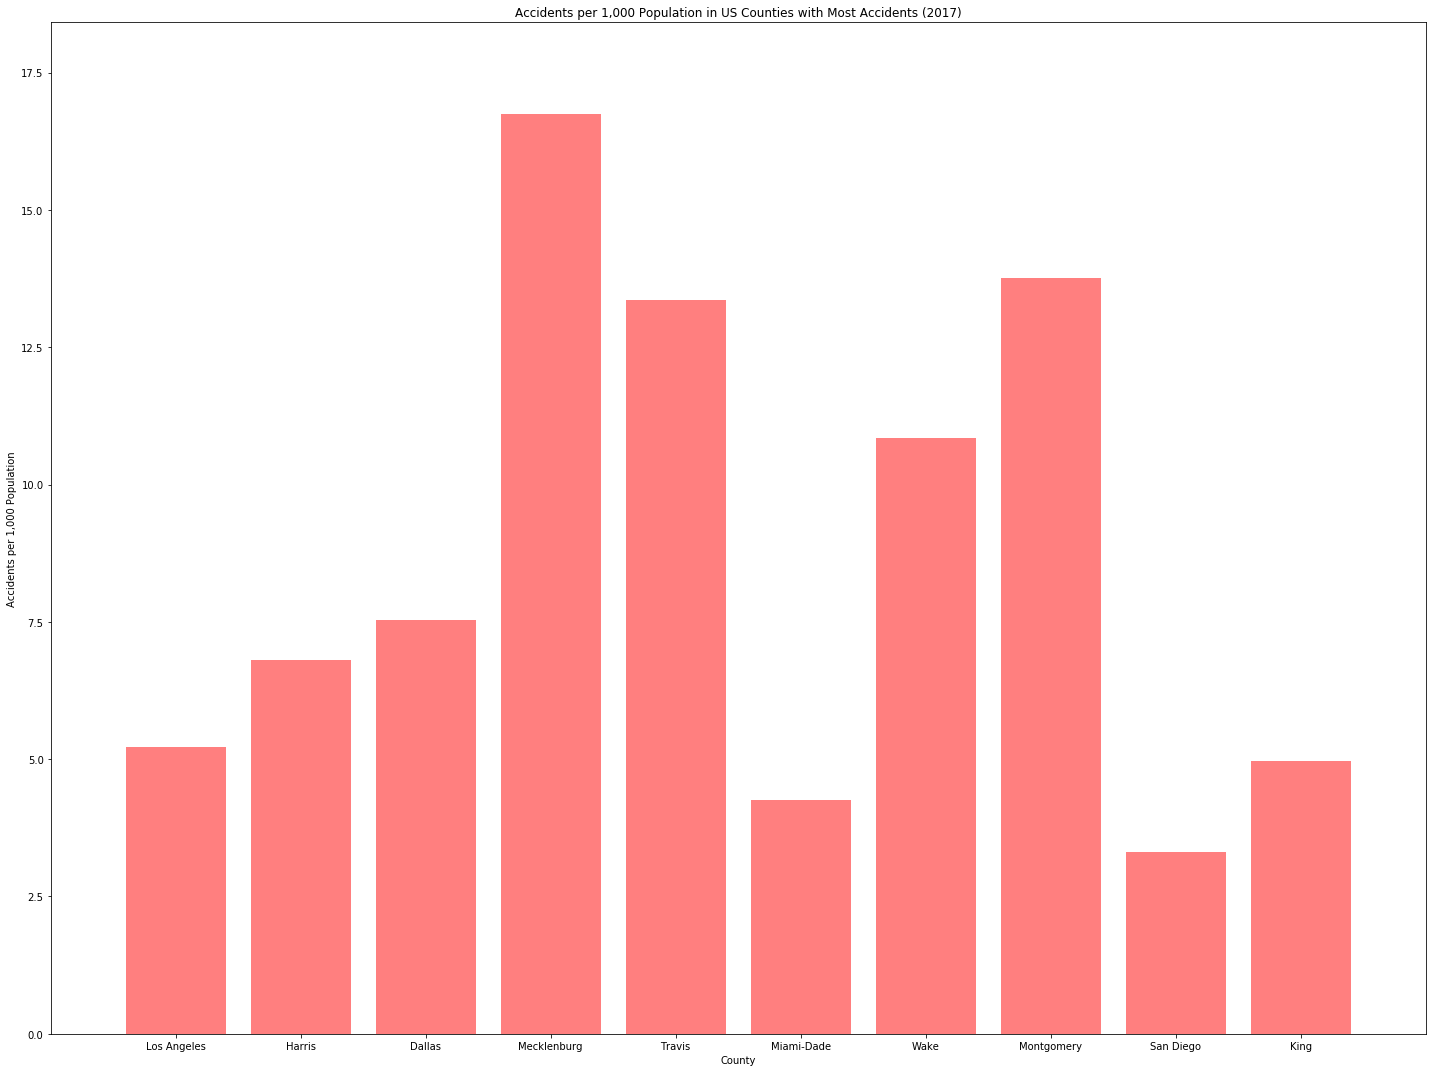

In [141]:
#set your top number here
top_number = 10

counties_tochart = df_2017co_popacc.iloc[0:top_number, :]

labels = counties_tochart["County"]

x = np.arange(len(labels))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(counties_tochart["County"], counties_tochart["Accidents per 1,000 Population"], color='r', alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-1, len(counties_tochart["County"]))
plt.ylim(0, max(counties_tochart["Accidents per 1,000 Population"]*1.1))

# # # Set a Title and labels
plt.title("Accidents per 1,000 Population in US Counties with Most Accidents (2017)")
plt.xlabel("County")
plt.ylabel("Accidents per 1,000 Population")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsperPopulation_byCounty.png")
plt.show()

###labels, design.. look at mapping

<h2> by City</h2>

In [190]:
###START HERE###
#Most Frequent Accident Cities in 2017 (population)
df_2017ci_popacc = pd.merge(dfcl_2017_city, dfcl_citypop, how="left", left_on=["City", "State"], 
                           right_on = ["City", "State"])
df_2017ci_popacc = df_2017ci_popacc[["Start_Year", "City", "State", "Number of Accidents", "2017"]]
df_2017ci_popacc = df_2017ci_popacc.rename(columns={"2017": "Population"})
df_2017ci_popacc ["Accidents per 1,000 Population"] = df_2017ci_popacc["Number of Accidents"]/df_2017ci_popacc["Population"]*1000
df_2017ci_popacc = df_2017ci_popacc.sort_values("Accidents per 1,000 Population", ascending = False)
df_2017ci_popacc = df_2017ci_popacc.sort_values("Number of Accidents", ascending = False)
df_2017ci_popacc.head(10)

#There are Nan Values, but the accident values are small; so it will be OK.
# df_2017ci_popacc.isna().sum()
# df1 = df_2017ci_popacc[df_2017ci_popacc.isna().any(axis=1)]
# df1["Number of Accidents"].max()

,Start_Year,City,State,Number of Accidents,Population,"Accidents per 1,000 Population"
11741,2017,Houston,TX,30282,2317445.0,13.066977
11740,2017,Dallas,TX,17188,1343087.0,12.797384
11739,2017,Charlotte,NC,16789,859347.0,19.536927
11738,2017,Los Angeles,CA,15346,3982002.0,3.853840
11737,2017,Austin,TX,15168,951750.0,15.936958
11736,2017,Atlanta,GA,10105,491763.0,20.548516
11735,2017,Miami,FL,9206,462030.0,19.925113
11734,2017,Raleigh,NC,8941,465524.0,19.206314
11733,2017,Seattle,WA,7404,729601.0,10.148012
11732,2017,Orlando,FL,7333,281143.0,26.082812


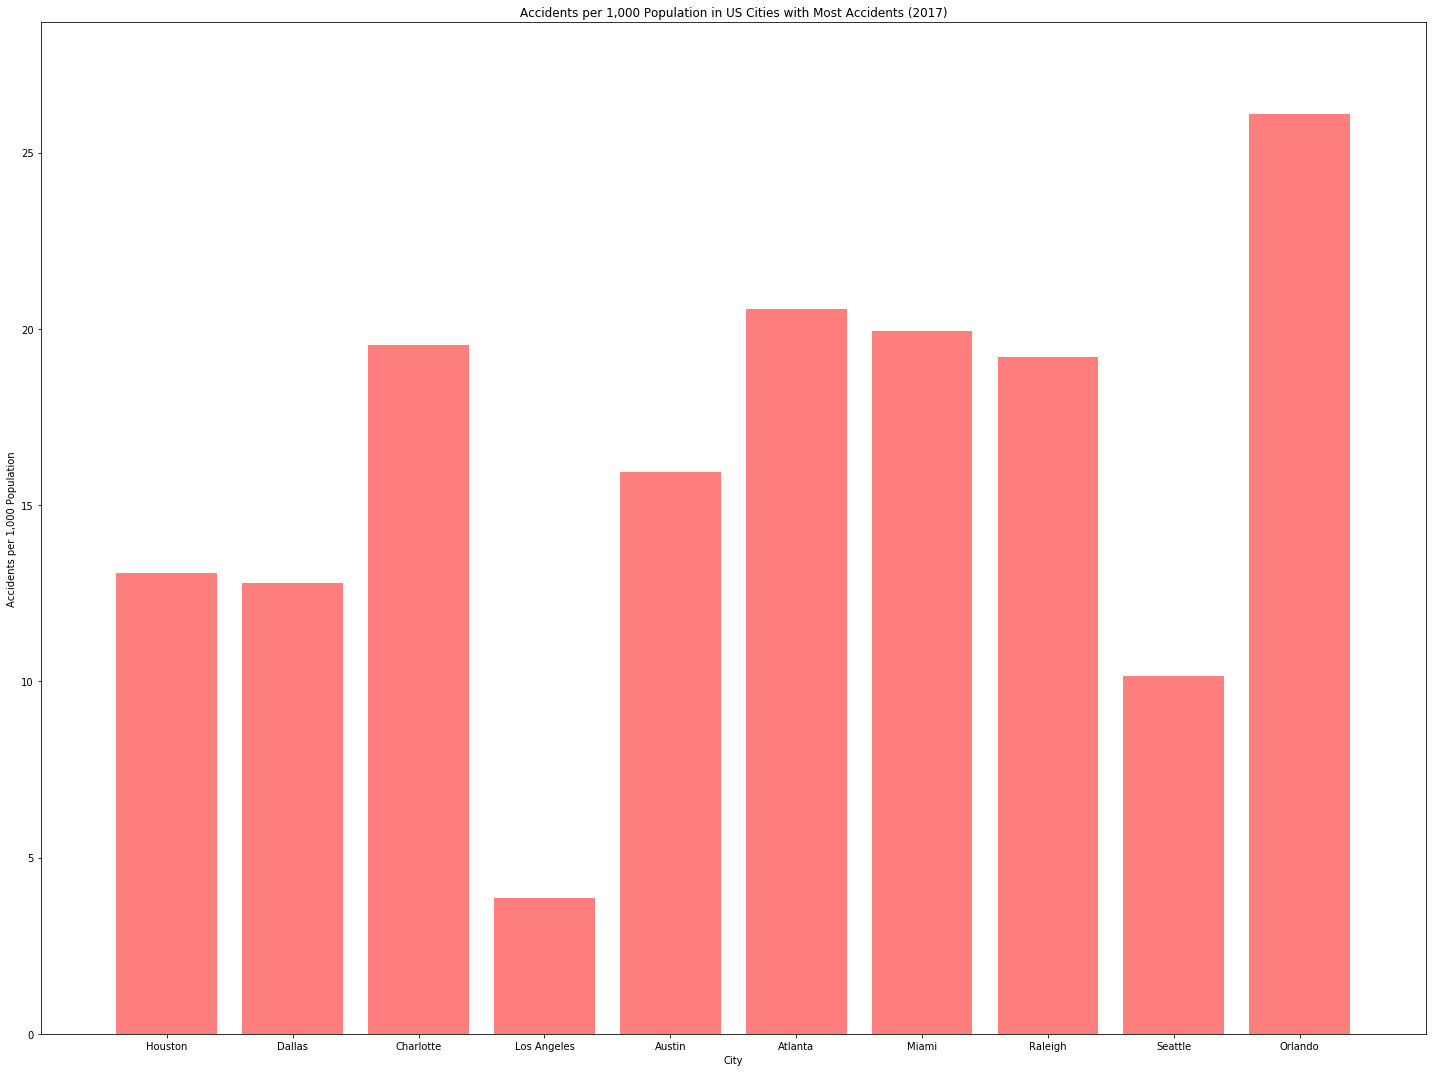

In [191]:
#set your top number here
top_number = 10

cities_tochart = df_2017ci_popacc.iloc[0:top_number, :]

labels = cities_tochart["City"]

x = np.arange(len(labels))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(cities_tochart["City"], cities_tochart["Accidents per 1,000 Population"], color='r', alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-1, len(cities_tochart["City"]))
plt.ylim(0, max(cities_tochart["Accidents per 1,000 Population"]*1.1))

# # # Set a Title and labels
plt.title("Accidents per 1,000 Population in US Cities with Most Accidents (2017)")
plt.xlabel("City")
plt.ylabel("Accidents per 1,000 Population")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsperPopulation_byCity.png")
plt.show()

###labels, design.. look at mapping

<h1>Severity Analysis - State</h1>

In [ ]:
###TBD###
# Highest % of accidents being "Severe" - state, county, city#
# Where do the most severe accidents occur?  (Heain) - 4
#City
dfcl_severity_2016 = dfcl_2016_loc[["City", "Severity", "ID"]]
count_severity2016 = dfcl_severity_2016.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2016 = pd.DataFrame({"Number of Accidents": count_severity2016})
dfcl_severity_2016 = dfcl_severity_2016.reset_index()
dfcl_severity_2016_4 = dfcl_severity_2016.loc[dfcl_severity_2016["Severity"] == 4, :].sort_values("Number of Accidents")

dfcl_severity_2017 = dfcl_2017_loc[["City", "Severity", "ID"]]
count_severity2017 = dfcl_severity_2017.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2017 = pd.DataFrame({"Number of Accidents": count_severity2017})
dfcl_severity_2017 = dfcl_severity_2017.reset_index()
dfcl_severity_2017_4 = dfcl_severity_2017.loc[dfcl_severity_2017["Severity"] == 4, :].sort_values("Number of Accidents")

dfcl_severity_2018 = dfcl_2018_loc[["City", "Severity", "ID"]]
count_severity2018 = dfcl_severity_2018.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2018 = pd.DataFrame({"Number of Accidents": count_severity2018})
dfcl_severity_2018 = dfcl_severity_2018.reset_index()
dfcl_severity_2018_4 = dfcl_severity_2018.loc[dfcl_severity_2018["Severity"] == 4, :].sort_values("Number of Accidents")

<h1>Time</h1>

In [229]:
#time of month for all years (2016 to 2018)
dfcl_month = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_month = dfcl_month.groupby('Start_Month')["ID"].count()
dfcl_month = pd.DataFrame({"Number of Accidents": count_month})
dfcl_month = dfcl_month.reset_index()
dfcl_month

dfcl_month_year = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_monthyear = dfcl_month_year.groupby(['Start_Year', 'Start_Month'])["ID"].count()
dfcl_month_year = pd.DataFrame({"Number of Accidents": count_monthyear})
dfcl_month_year = dfcl_month_year.reset_index()
dfcl_month_year["Start_Month"] = dfcl_month_year["Start_Month"].replace({"01": 1, "02": 2, "03": 3, "04":4, "05": 5, 
                                           "06": 6, "07": 7, "08": 8, "09": 9})

dfcl_month_year

dfcl_2016_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_month
dfcl_2017_month
dfcl_2018_month

,Start_Year,Start_Month,Number of Accidents
31,2018,7,65747
30,2018,6,67787
36,2018,12,70208
26,2018,2,71463
28,2018,4,72589
33,2018,9,73283
27,2018,3,74417
25,2018,1,74999
32,2018,8,76381
29,2018,5,76477


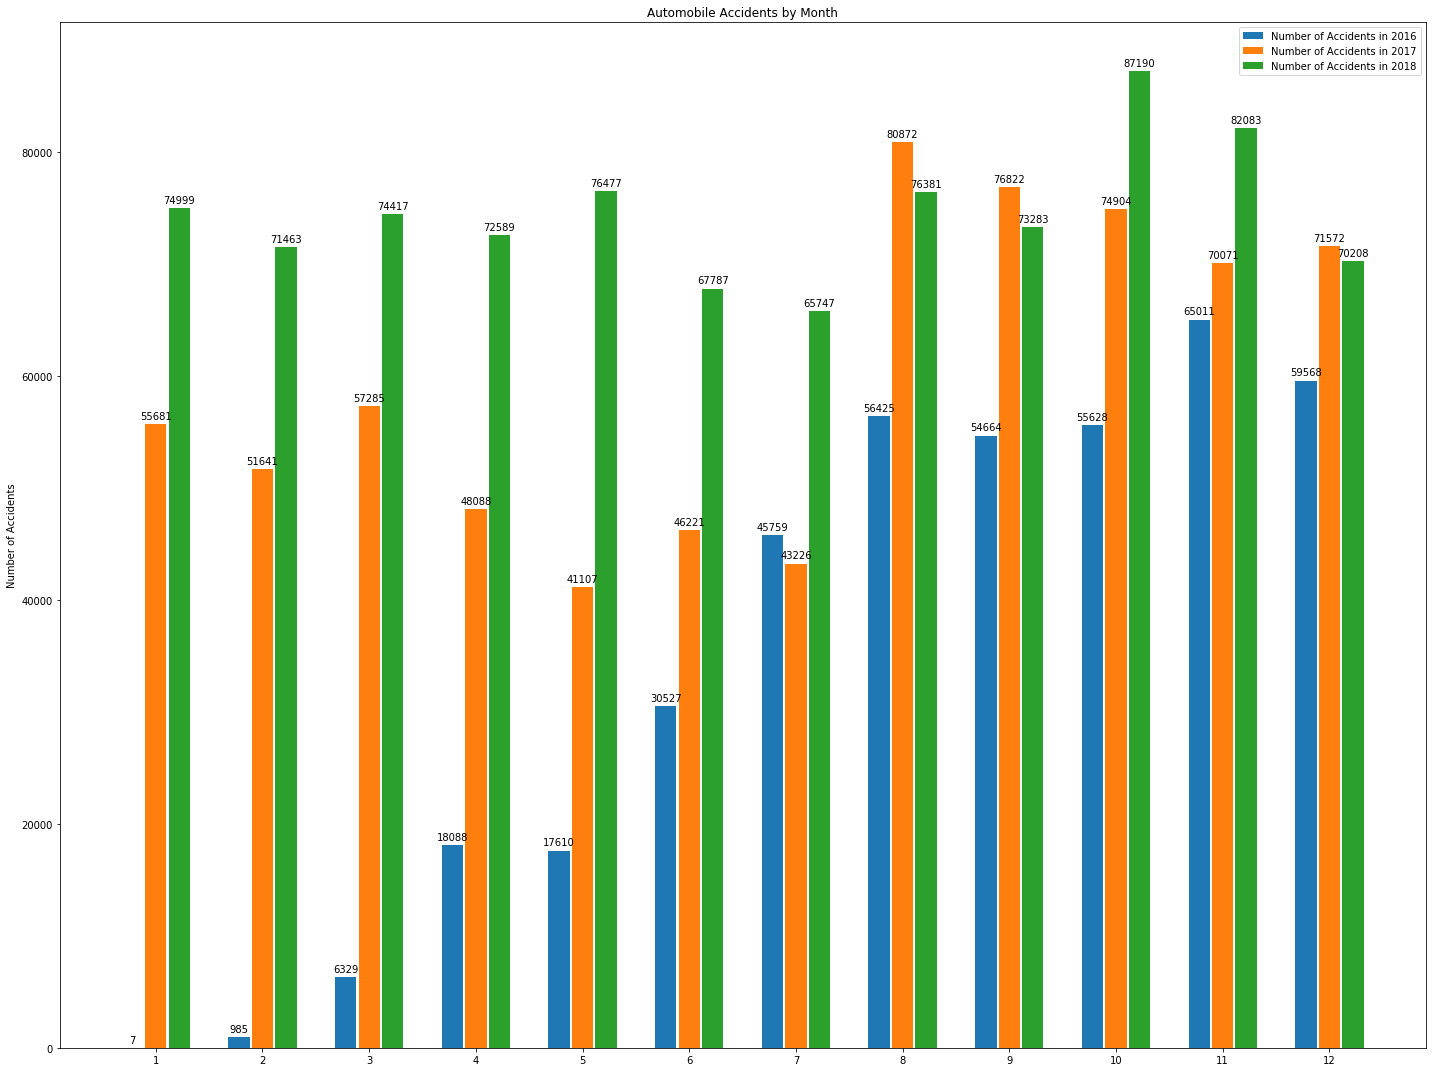

In [231]:
#set your top number here
top_number = 10

months_to_chart = dfcl_2016_month
months_to_chart = months_to_chart.rename(columns={"Number of Accidents": "Number of Accidents in 2016"}).drop("Start_Year", axis = 1)
months_to_chart = pd.merge(months_to_chart, dfcl_2017_month, how="outer", on = "Start_Month")
months_to_chart = months_to_chart.rename(columns={"Number of Accidents": "Number of Accidents in 2017"}).drop("Start_Year", axis = 1)
months_to_chart = pd.merge(months_to_chart, dfcl_2018_month, how="outer", on = "Start_Month")
months_to_chart = months_to_chart.rename(columns={"Number of Accidents": "Number of Accidents in 2018"}).drop("Start_Year", axis = 1)
months_to_chart = months_to_chart.sort_values("Start_Month")

labels = months_to_chart["Start_Month"]
acc_2016 = months_to_chart["Number of Accidents in 2016"]
acc_2017 = months_to_chart["Number of Accidents in 2017"]
acc_2018 = months_to_chart["Number of Accidents in 2018"]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, acc_2016, width, label='Number of Accidents in 2016')
rects2 = ax.bar(x, acc_2017, width, label='Number of Accidents in 2017')
rects3 = ax.bar(x + width*1.1, acc_2018, width, label='Number of Accidents in 2018')


# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents')
ax.set_title('Automobile Accidents by Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig("Outputs/AccidentsbyMonth.png")
plt.show()

C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\heain\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


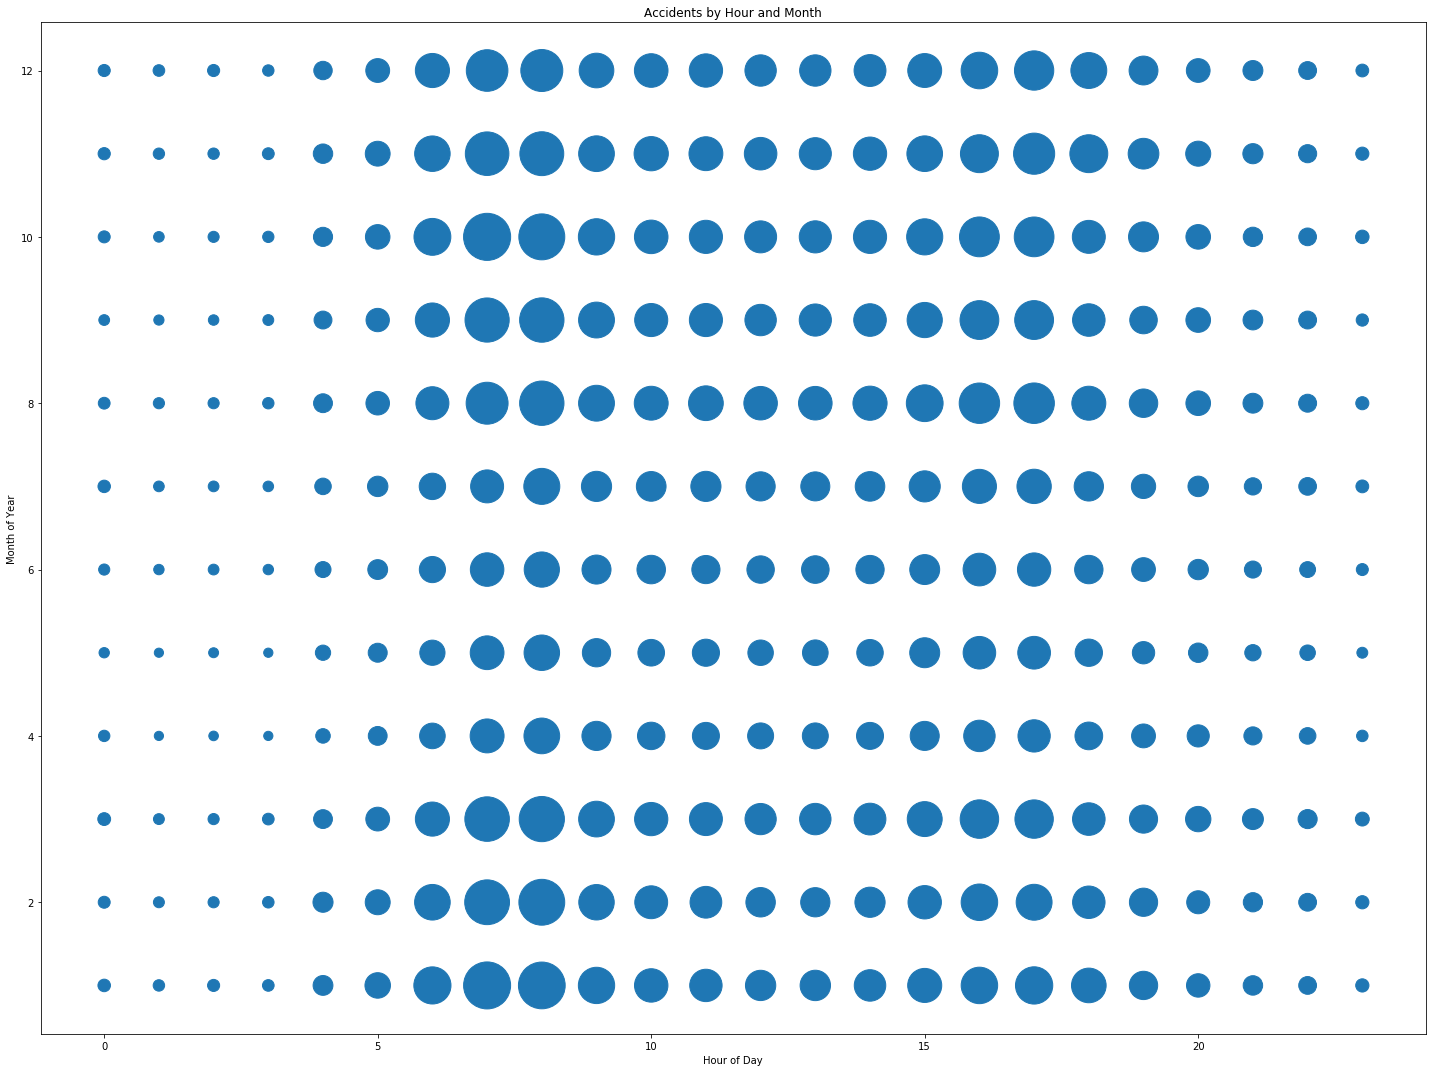

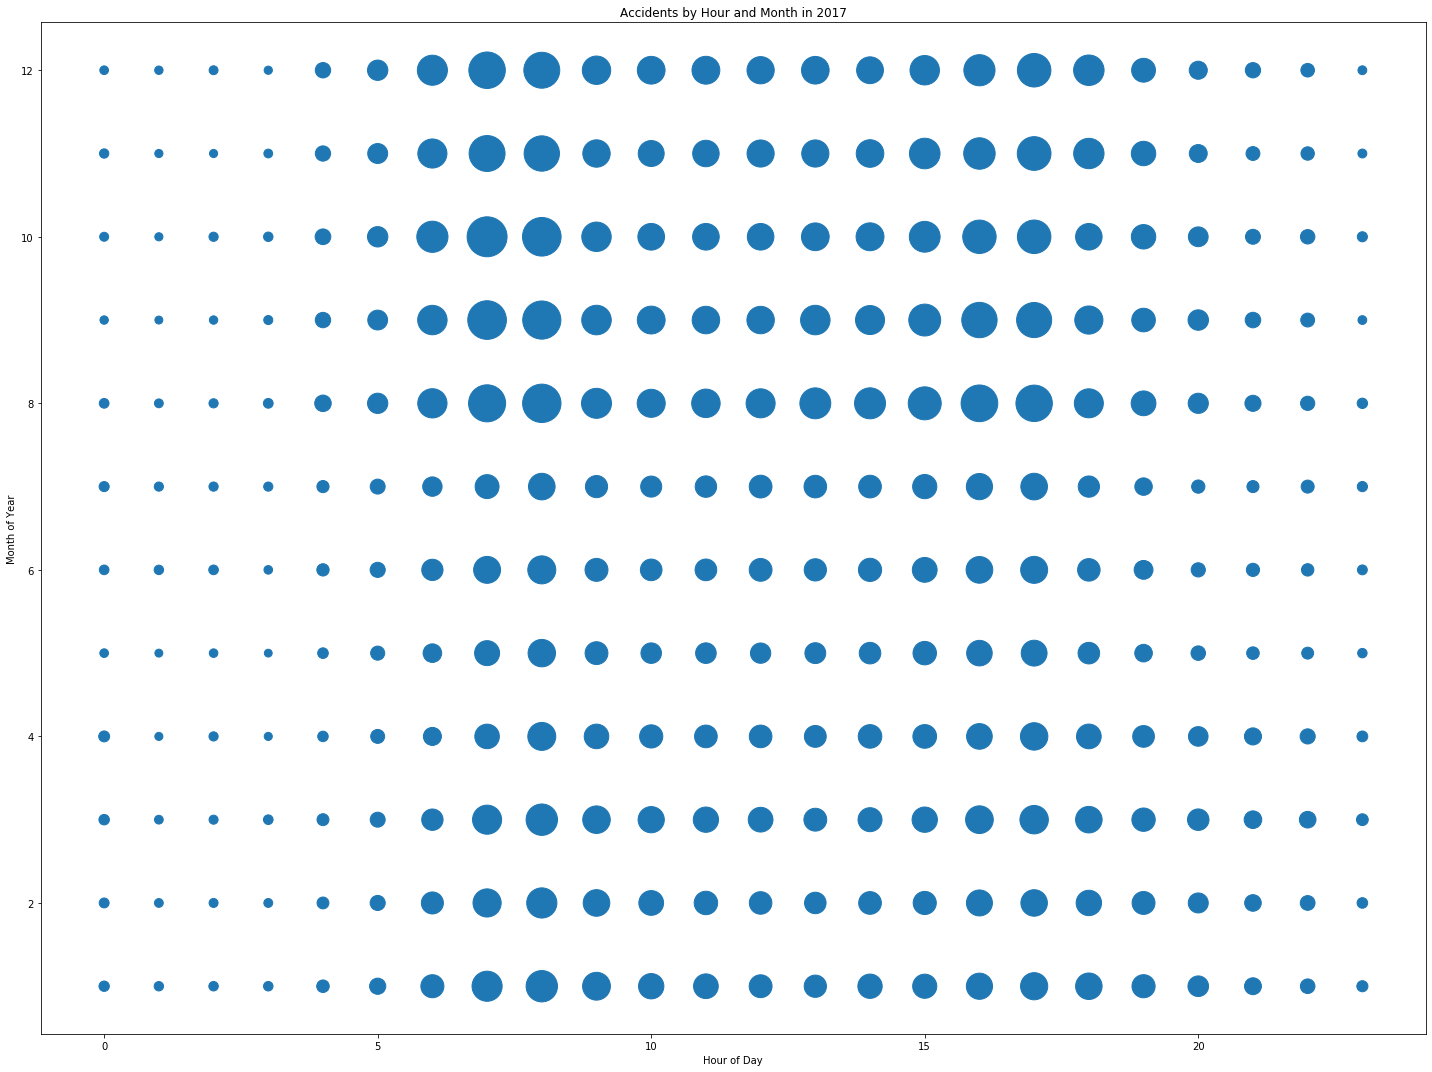

In [268]:
#time of day for all years (2016 to 2018)
dfcl_hour = dfcl_location[["Start_Year", "Start_Month", "Start_Hr", "ID"]]
dfcl_hour["Start_Hr"] = dfcl_hour["Start_Hr"].replace({"00": 0, "01": 1, "02": 2, "03": 3, "04":4, "05": 5, 
                                           "06": 6, "07": 7, "08": 8, "09": 9})
dfcl_hour["Start_Month"] = dfcl_hour["Start_Month"].replace({"01": 1, "02": 2, "03": 3, "04":4, "05": 5, 
                                           "06": 6, "07": 7, "08": 8, "09": 9})
hour_groups = dfcl_hour.groupby(['Start_Hr', "Start_Month"])["ID"].count()
dfcl_hour = pd.DataFrame({"Number of Accidents": hour_groups})
dfcl_hour=dfcl_hour.reset_index()
dfcl_hour

plt.figure(figsize=(20,15))
plt.scatter(dfcl_hour["Start_Hr"], dfcl_hour["Start_Month"], s = dfcl_hour["Number of Accidents"]/10)

plt.title("Accidents by Hour and Month")
plt.xlabel("Hour of Day")
plt.ylabel("Month of Year")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsbyHourandMonth.png")
plt.show()


#time of day for 2017
dfcl_2017_hourmonth = dfcl_location[["Start_Year", "Start_Month", "Start_Hr", "ID"]]
dfcl_2017_hourmonth =  dfcl_2017_hourmonth.loc[dfcl_2017_hourmonth["Start_Year"] == "2017", :]
dfcl_2017_hourmonth["Start_Hr"] = dfcl_2017_hourmonth["Start_Hr"].replace({"00": 0, "01": 1, "02": 2, "03": 3, "04":4, "05": 5, 
                                           "06": 6, "07": 7, "08": 8, "09": 9})
dfcl_2017_hourmonth["Start_Month"] = dfcl_2017_hourmonth["Start_Month"].replace({"01": 1, "02": 2, "03": 3, "04":4, "05": 5, 
                                           "06": 6, "07": 7, "08": 8, "09": 9})
hour_groups2017 = dfcl_2017_hourmonth.groupby(['Start_Hr', "Start_Month"])["ID"].count()
hour_groups2017 = pd.DataFrame({"Number of Accidents": hour_groups2017})
hour_groups2017=hour_groups2017.reset_index()
hour_groups2017

plt.figure(figsize=(20,15))
plt.scatter(hour_groups2017["Start_Hr"], hour_groups2017["Start_Month"], s = hour_groups2017["Number of Accidents"]/5)

plt.title("Accidents by Hour and Month in 2017")
plt.xlabel("Hour of Day")
plt.ylabel("Month of Year")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsbyHourandMonth2017.png")
plt.show()


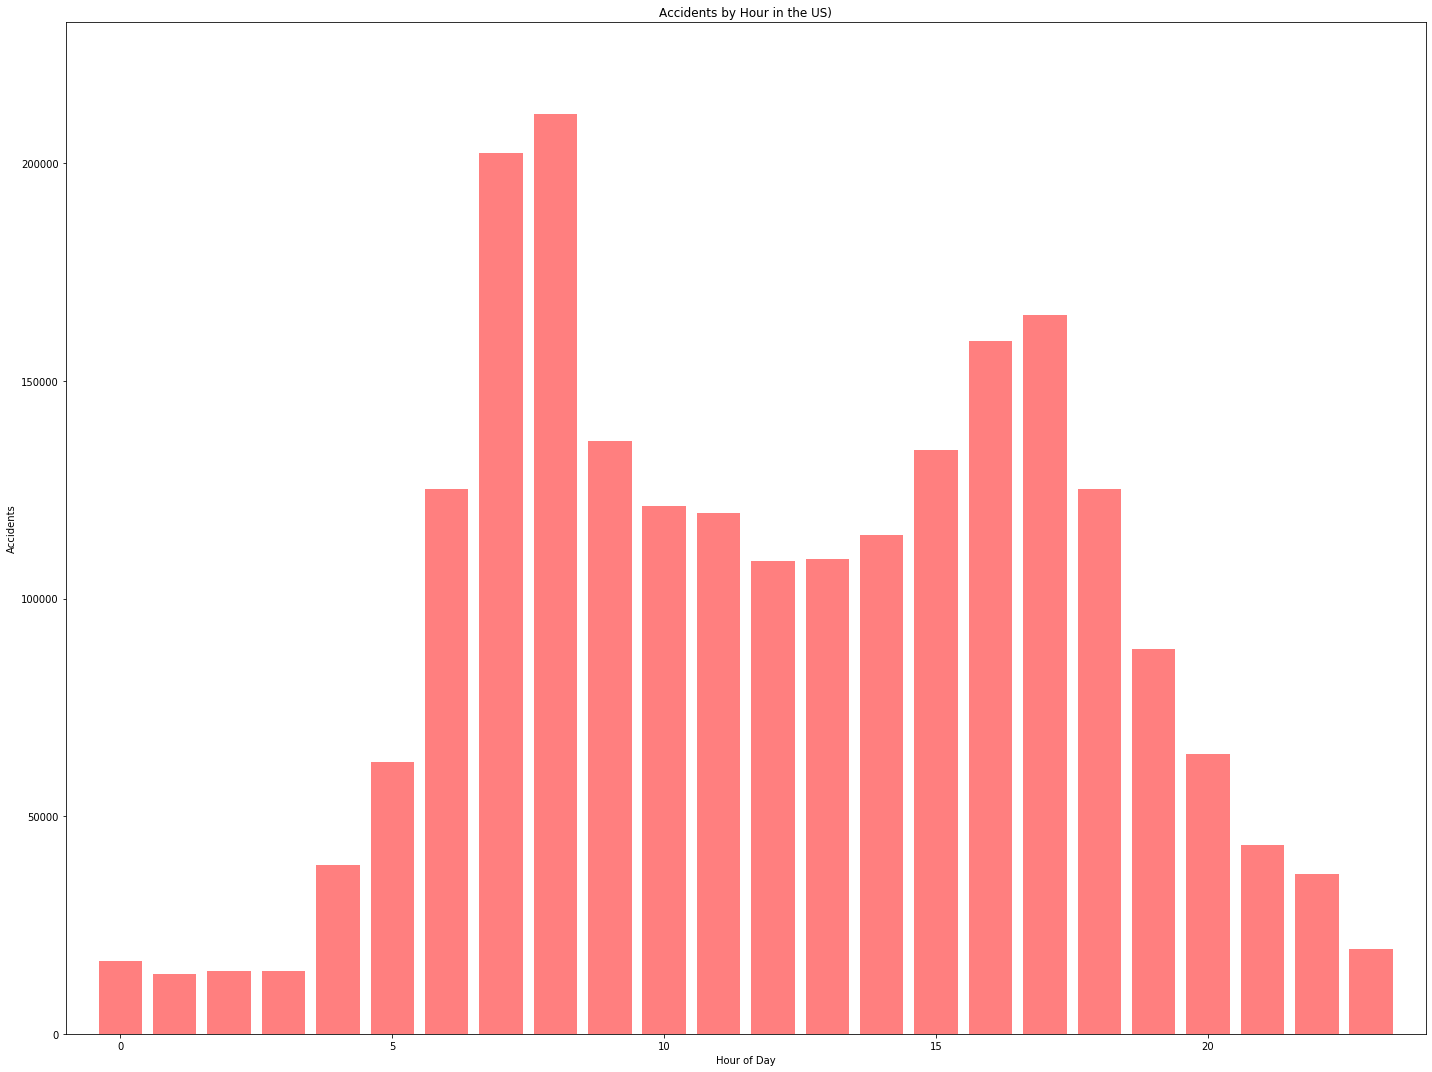

In [250]:
#time of day for 2017
dfcl_2017_hour =  dfcl_hour.loc[dfcl_hour["Start_Year"] == "2017", :]
dfcl_2017_hour = dfcl_location[["Start_Year", "Start_Month", "Start_Hr", "ID"]]
count_hour = dfcl_hour.groupby('Start_Hr')["ID"].count()
dfcl_2017_hour = pd.DataFrame({"Number of Accidents": count_hour})
dfcl_2017_hour = dfcl_2017_hour.reset_index()
dfcl_2017_hour


labels = dfcl_2017_hour["Start_Hr"]

x = np.arange(len(labels))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(dfcl_2017_hour["Start_Hr"], dfcl_2017_hour["Number of Accidents"], color='r', alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-1, len(dfcl_2017_hour["Start_Hr"]))
plt.ylim(0, max(dfcl_2017_hour["Number of Accidents"]*1.1))

# # # Set a Title and labels
plt.title("Accidents by Hour in the US)")
plt.xlabel("Hour of Day")
plt.ylabel("Accidents")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsbyHour.png")
plt.show()

<h1>Severity Analysis - Time</h1>

In [ ]:
# Highest % of accidents being "Severe" - month, time of day

<h3>Old Code</h3>

In [ ]:
dfcl_city = dfcl_location[["Start_Year", "City", "ID"]]
count_city = dfcl_city.groupby(['Start_Year', 'City'])["ID"].count()
dfcl_city_year = pd.DataFrame({"Number of Accidents": count_city})
dfcl_city_year = dfcl_city_year.reset_index()

dfcl_2016_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

# dfcl_2016_city
# dfcl_2017_city
# dfcl_2018_city


In [ ]:
# df_bycounty
dfcl_county = dfcl_location[["Start_Year", "County", "ID"]]
count_county = dfcl_county.groupby(['Start_Year', 'County'])["ID"].count()
dfcl_county_year = pd.DataFrame({"Number of Accidents": count_county})
dfcl_county_year = dfcl_county_year.reset_index()
# dfcl_county_year

dfcl_2016_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_county
dfcl_2017_county
dfcl_2018_county



In [ ]:
# df_bystate
dfcl_state = dfcl_location[["Start_Year", "State", "ID"]]
count_state = dfcl_state.groupby(['Start_Year', 'State'])["ID"].count()
dfcl_state_year = pd.DataFrame({"Number of Accidents": count_state})
dfcl_state_year = dfcl_state_year.reset_index()
dfcl_state_year

dfcl_2016_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_state
dfcl_2017_state
dfcl_2018_state

In [ ]:
#create change over previous years... and looks like there's some data gathering issues...
dfcl_countychange = dfcl_county
dfcl_countychange["Change over last year"] = (dfcl_countychange["Number of Accidents in 2017"]-dfcl_countychange["Number of Accidents in 2016"])/dfcl_countychange["Number of Accidents in 2016"]*100
dfcl_countychange = dfcl_countychange.sort_values("Change over last year", ascending = False).reset_index(drop = True)
dfcl_countychange = dfcl_countychange.replace([np.inf, -np.inf], np.nan)
dfcl_countychange = dfcl_countychange.dropna(how='any')
dfcl_countychange
##Does not seem interesting

In [ ]:
# df_bytimezone
dfcl_timezone = dfcl_location[["Start_Year", "Timezone", "ID"]]
count_timezone = dfcl_timezone.groupby(['Start_Year', 'Timezone'])["ID"].count()
dfcl_timezone_year = pd.DataFrame({"Number of Accidents": count_timezone})
dfcl_timezone_year = dfcl_timezone_year.reset_index()
dfcl_timezone_year

dfcl_2016_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_timezone
dfcl_2017_timezone
dfcl_2018_timezone

# df_bytimezone (This is from the original data set)
dfcl_timezone = dfcl_location[["Start_Year", "Timezone", "ID"]]
count_timezone = dfcl_timezone.groupby(['Start_Year', 'Timezone'])["ID"].count()
dfcl_timezone_year = pd.DataFrame({"Number of Accidents": count_timezone})
dfcl_timezone_year = dfcl_timezone_year.reset_index()
dfcl_timezone_year

#Accidents by Timezone

# Create timezone data frame -- this analysis had to be redone to compare with Dept of T data, which is organized by state.
df_timezone = dfcl_location
df_timezone = df_timezone.drop_duplicates(subset = 'State', keep = 'first')
df_timezone = df_timezone[["State", "Timezone"]]
df_timezone

# merged data set with state and timezone
df_2017tz_dlacc_setup = pd.merge(df_2017st_dlacc, df_timezone, how="left", on=["State"])
df_2017tz_dlacc_setup = df_2017tz_dlacc_setup.drop("Accidents per 1,000 Drivers", axis = 1)

#groupby
groupby_tzaccidents = df_2017tz_dlacc.groupby("Timezone")["Number of Accidents"].sum()
groupby_tzld = df_2017tz_dlacc.groupby("Timezone")["Licensed Drivers"].sum()
df_2017tz_dlacc = pd.DataFrame ({"Number of Accidents" : groupby_tzaccidents,
                                "Licensed Drivers": groupby_tzld})
df_2017tz_dlacc= df_2017tz_dlacc.sort_values("Number of Accidents", ascending = False)
df_2017tz_dlacc.head()

#Most Frequent Accident Timezones in 2017
df_2017tz_dlacc ["Accidents per 1,000 Drivers"] = df_2017tz_dlacc["Number of Accidents"]/df_2017tz_dlacc["Licensed Drivers"]*1000
df_2017tz_dlacc = df_2017tz_dlacc.sort_values("Accidents per 1,000 Drivers", ascending = False)
df_2017tz_dlacc = df_2017tz_dlacc.reset_index()
df_2017tz_dlacc.head()

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(df_2017tz_dlacc["Timezone"], df_2017tz_dlacc["Accidents per 1,000 Drivers"], color='r', alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-1, len(df_2017tz_dlacc["Timezone"]))
plt.ylim(0, max(df_2017tz_dlacc["Accidents per 1,000 Drivers"]*1.1))

# # # Set a Title and labels
plt.title("Accidents per 1,000 Licensed Drivers in the US by Timezone (2017)")
plt.xlabel("Timezone")
plt.ylabel("Accidents per 1,000 Licensed Drivers")

# # # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsperDrivers_byTimezone.png")
plt.show()


###labels, design.. look at mapping

In [ ]:
# df_by month
dfcl_month = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_month = dfcl_month.groupby('Start_Month')["ID"].count()
dfcl_month = pd.DataFrame({"Number of Accidents": count_month})
dfcl_month = dfcl_month.reset_index()
dfcl_month

dfcl_month_year = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_monthyear = dfcl_month_year.groupby(['Start_Year', 'Start_Month'])["ID"].count()
dfcl_month_year = pd.DataFrame({"Number of Accidents": count_monthyear})
dfcl_month_year = dfcl_month_year.reset_index()
dfcl_month_year

dfcl_2016_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_month
dfcl_2017_month
dfcl_2018_month

In [ ]:
# df_by hour
dfcl_hour = dfcl_location[["Start_Year", "Start_Hr", "ID"]]
count_hour = dfcl_hour.groupby('Start_Hr')["ID"].count()
dfcl_hour = pd.DataFrame({"Number of Accidents": count_hour})
dfcl_hour = dfcl_hour.reset_index()
dfcl_hour

dfcl_hour_month = dfcl_location[["Start_Hr", "Start_Month", "ID"]]
count_hourmonth = dfcl_hour_month.groupby(['Start_Month', 'Start_Hr'])["ID"].count()
dfcl_hour_month = pd.DataFrame({"Number of Accidents": count_hourmonth})
dfcl_hour_month = dfcl_hour_month.reset_index()
dfcl_hour_month

dfcl_hour_Jan =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "01", :].sort_values("Number of Accidents")
dfcl_hour_Feb =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "02", :].sort_values("Number of Accidents")
dfcl_hour_Mar =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "03", :].sort_values("Number of Accidents")
dfcl_hour_Mar

In [ ]:
#Visualize - https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0